In [1]:
%load_ext autoreload
%autoreload 2

os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [19]:
import torch
from utils import *
from collections import defaultdict
import matplotlib.pyplot as plt
import time
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [22]:
from dataset.database import read_depth

def get_depth(depth_filename):
    # depth_filename = os.path.join(self.root_dir, f'Depths_raw/{self.model_name}/depth_map_{img_id:04d}.pfm')
    depth_map = read_depth(depth_filename) * 1./200
    return depth_map

In [31]:

with open('data/model/neuray_ft_scan103_cv_640_512_scalarsigmaprompt_consistent_loss_renderdepth_max/render_1/consis_weight_cosin.pkl', 'rb') as handle:
    pk_dict = pickle.load(handle)

depth_gt = get_depth('/home/ubuntu/nerf_ws/NeuRay/data/DTU_MVS/dtu_training/Depths_raw/scan114/depth_map_0000.pfm')

In [32]:
consis_weight = (pk_dict['consistent_weights'] - 0.5) *2
que_depth = pk_dict['que_depth']

In [26]:
x = 340
y = 123

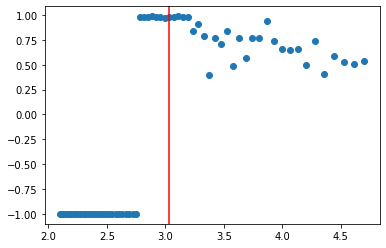

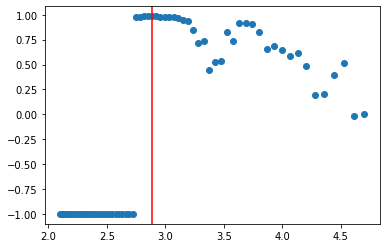

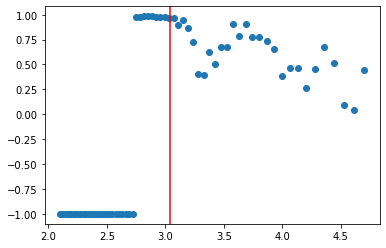

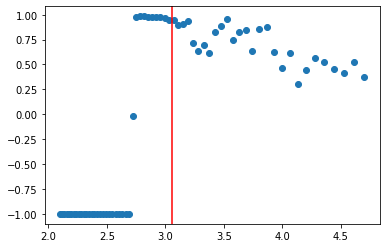

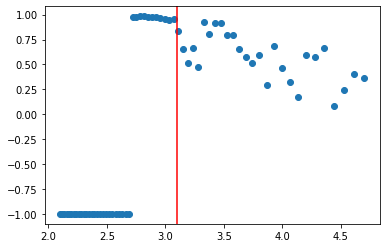

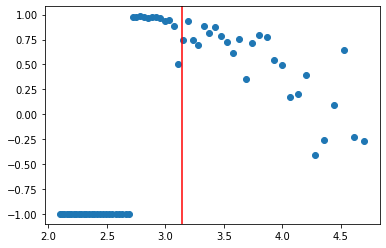

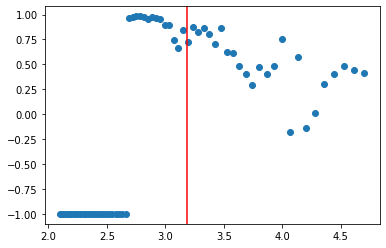

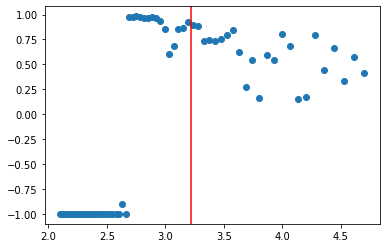

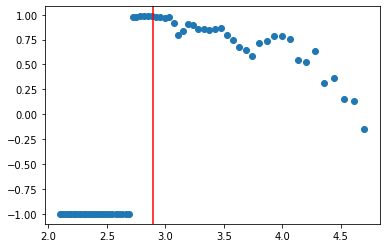

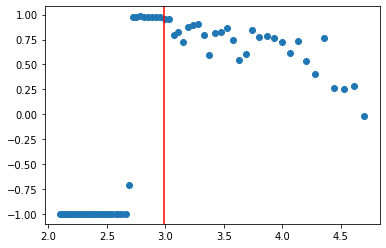

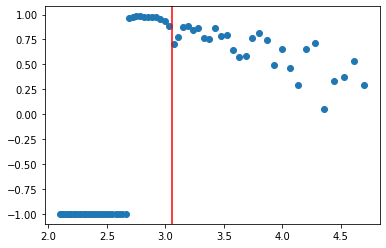

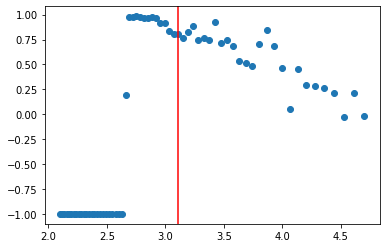

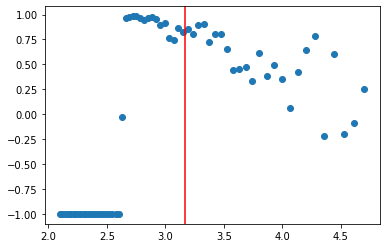

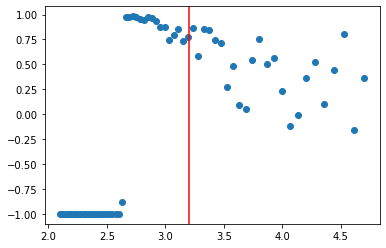

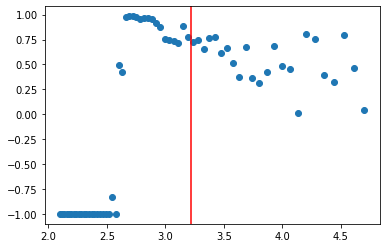

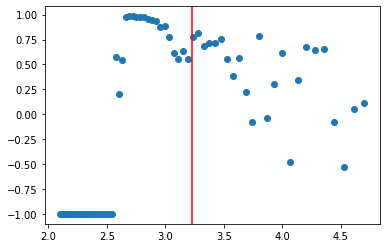

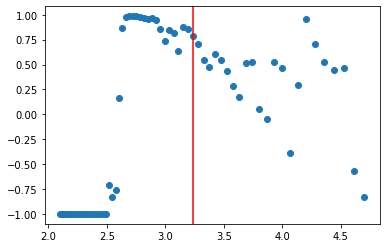

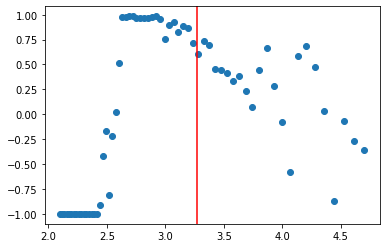

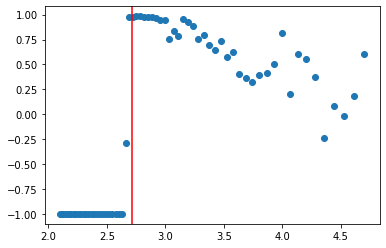

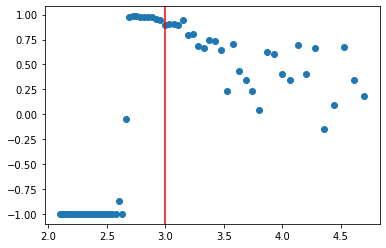

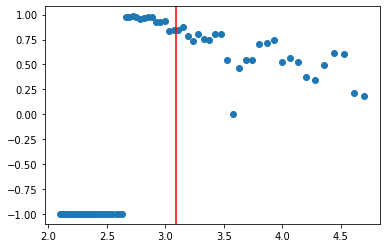

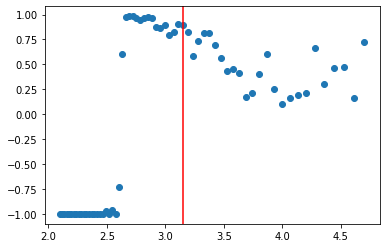

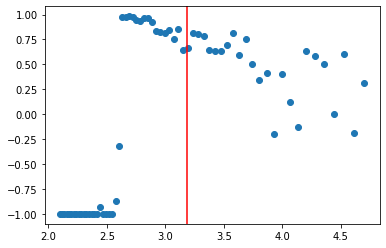

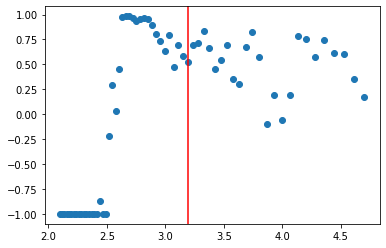

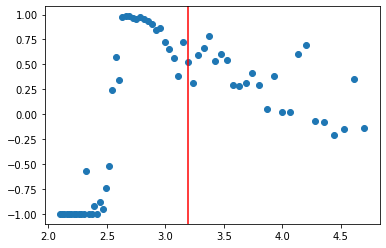

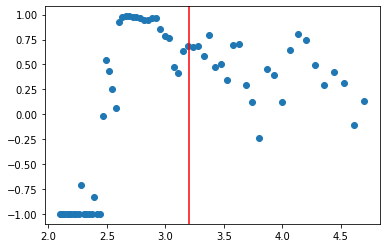

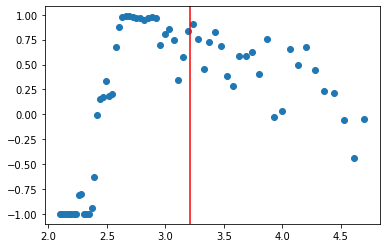

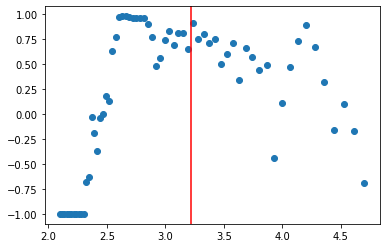

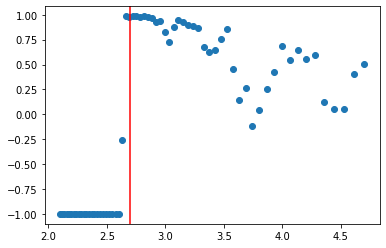

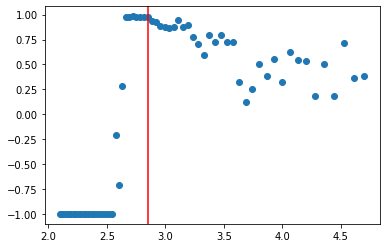

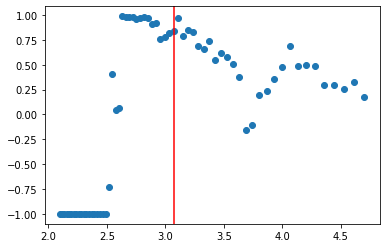

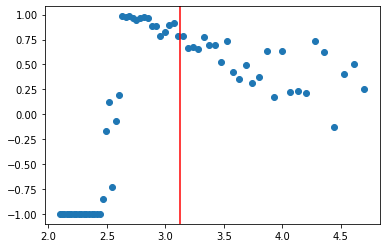

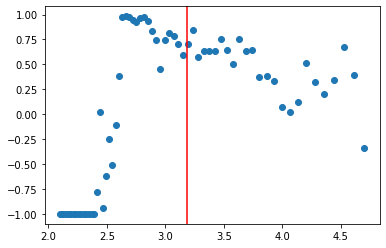

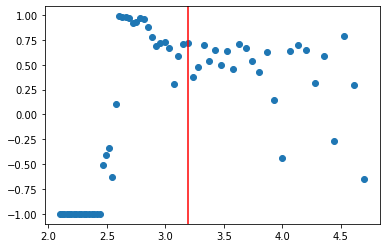

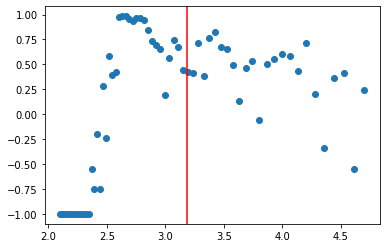

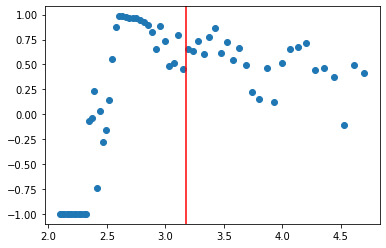

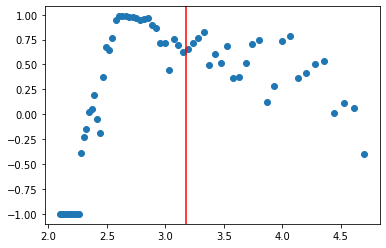

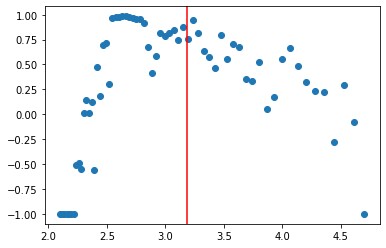

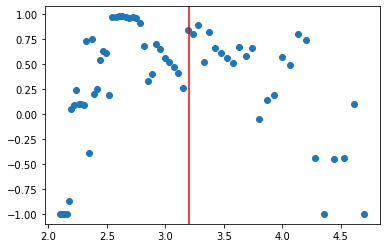

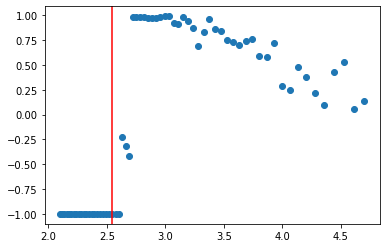

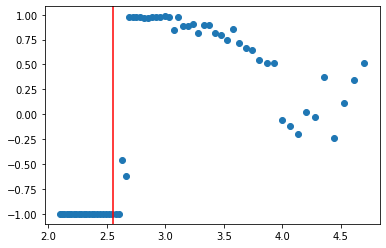

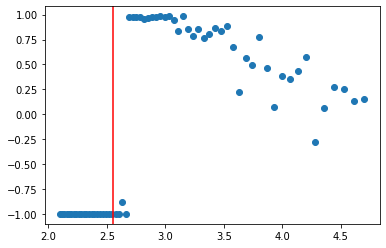

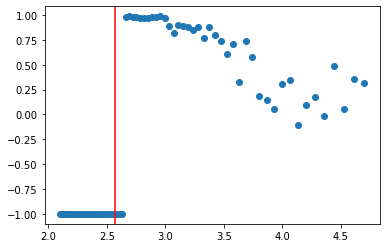

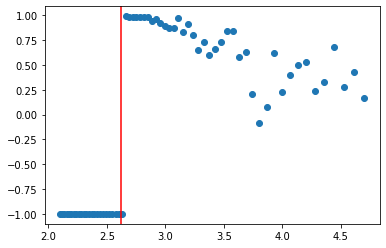

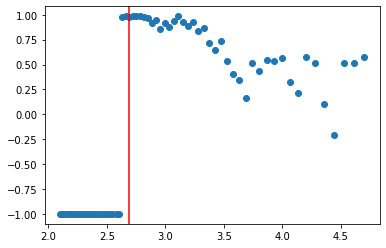

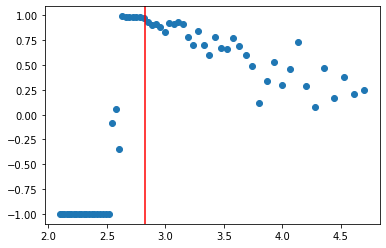

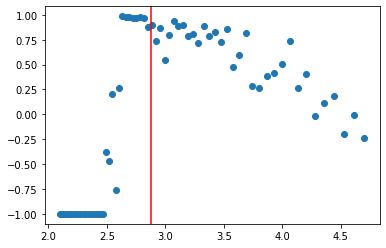

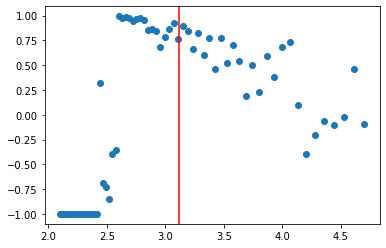

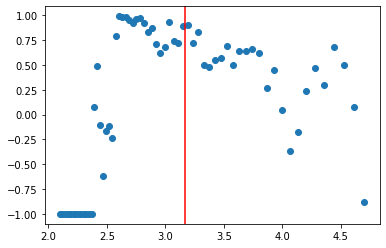

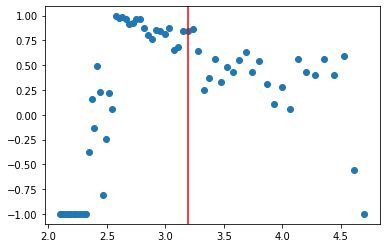

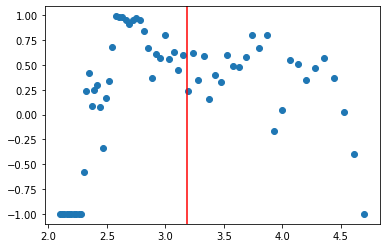

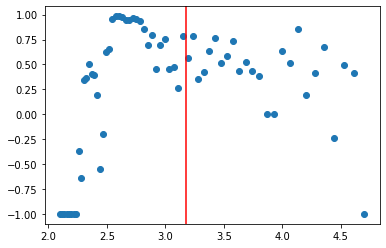

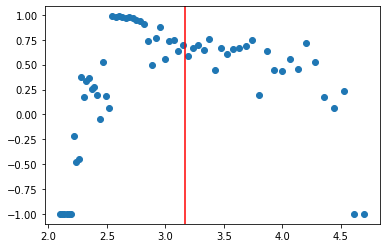

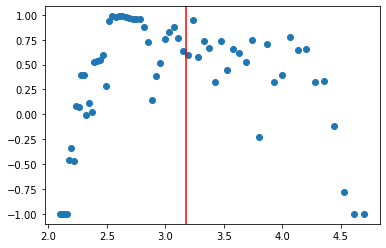

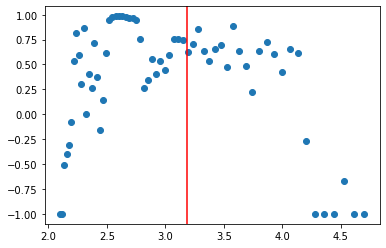

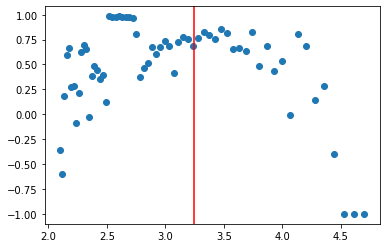

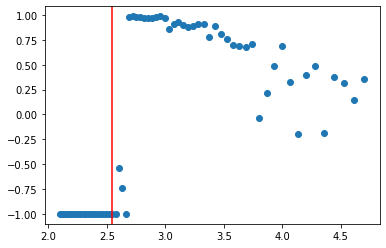

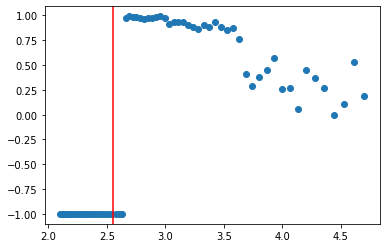

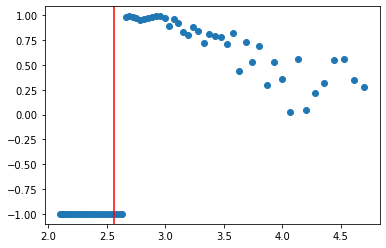

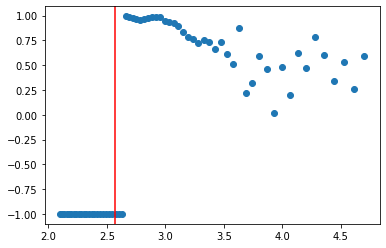

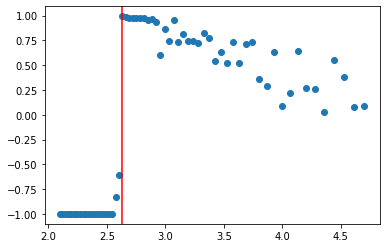

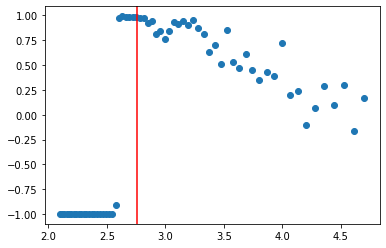

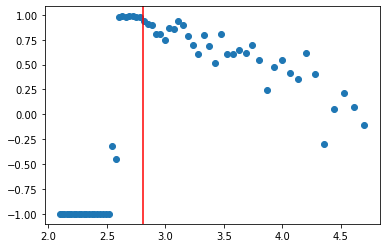

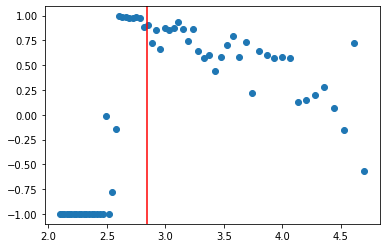

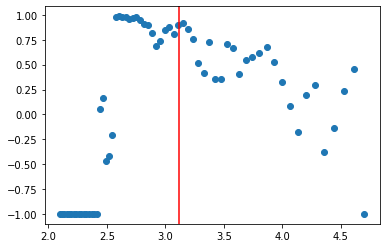

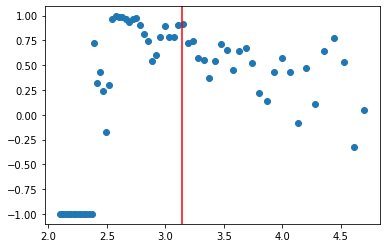

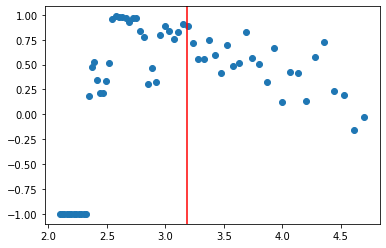

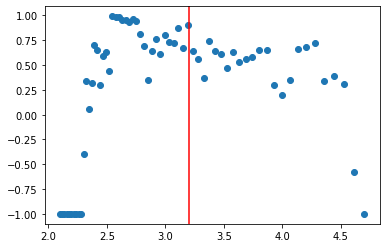

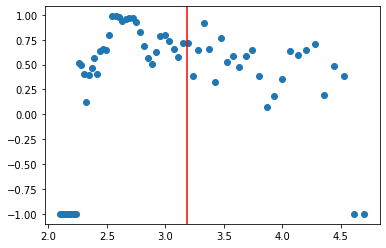

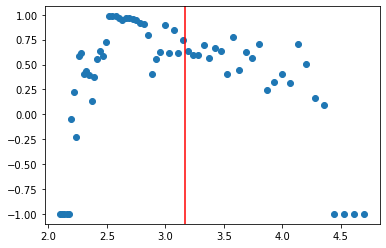

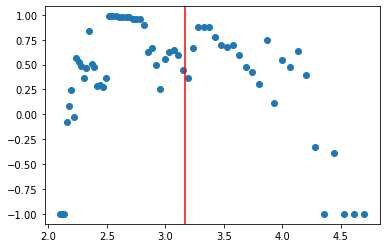

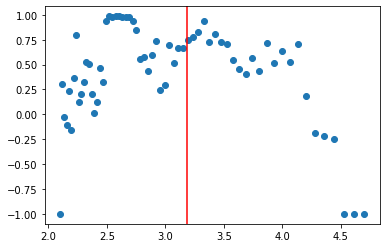

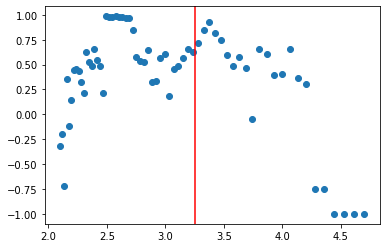

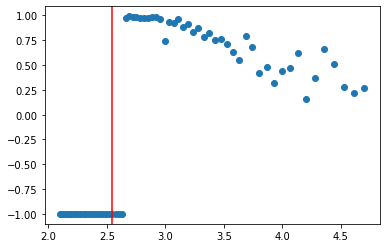

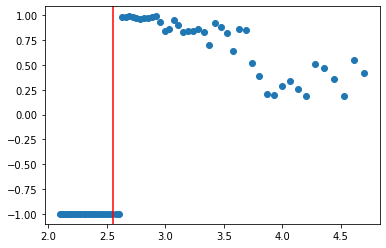

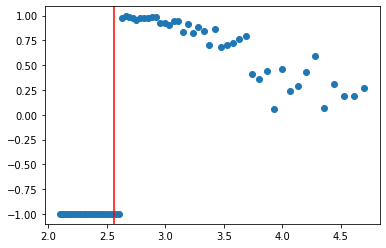

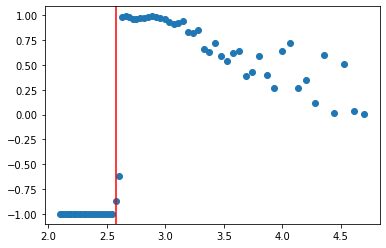

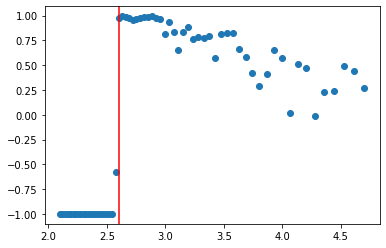

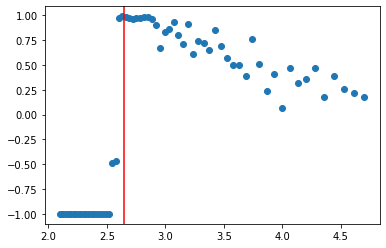

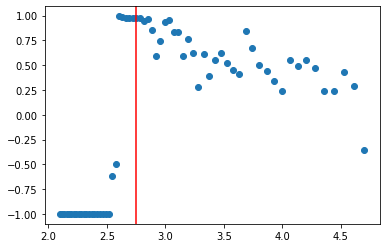

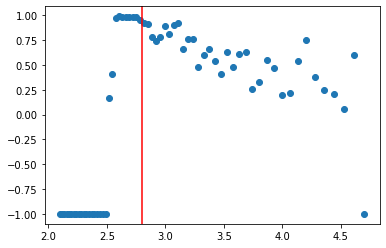

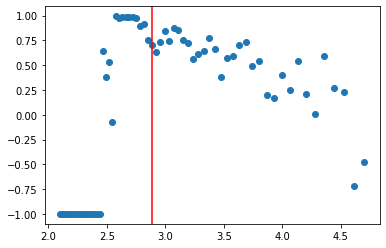

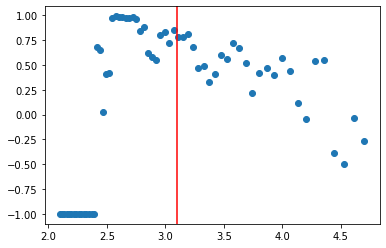

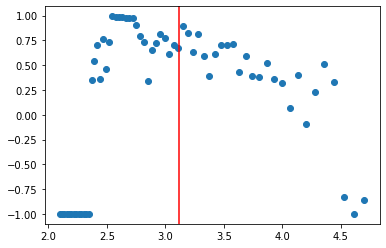

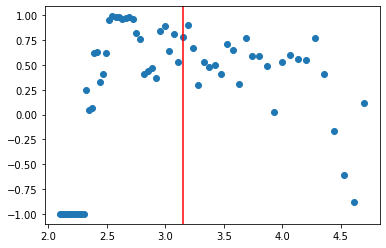

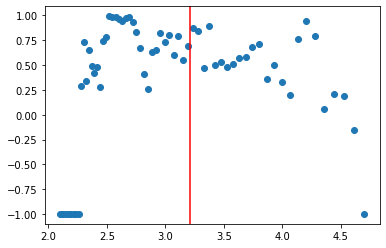

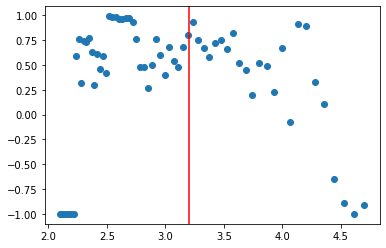

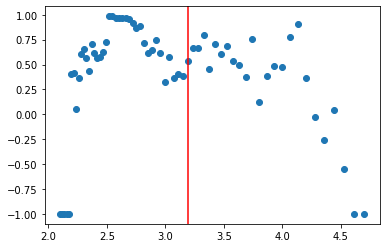

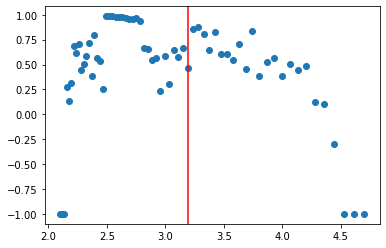

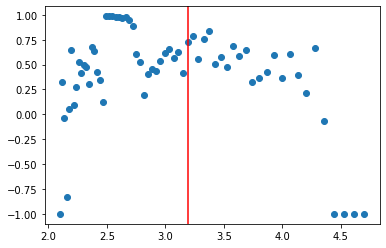

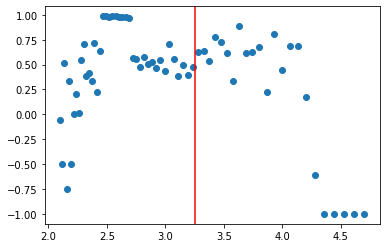

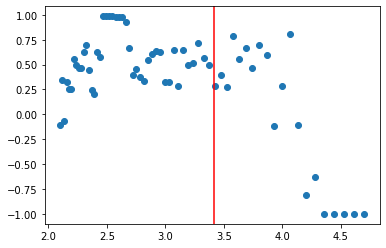

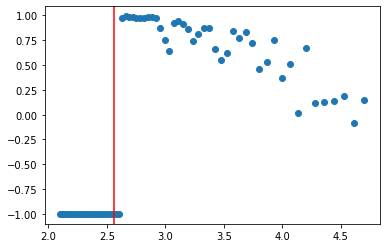

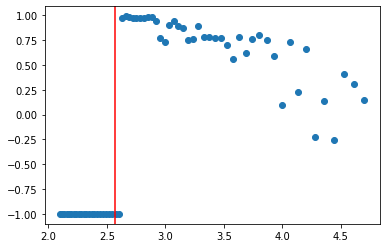

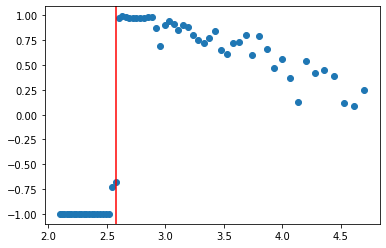

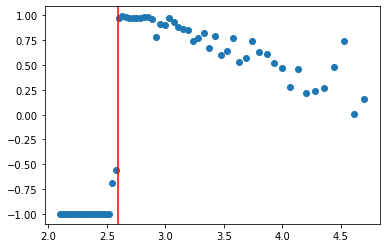

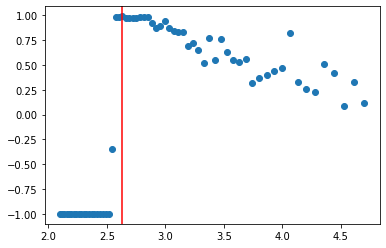

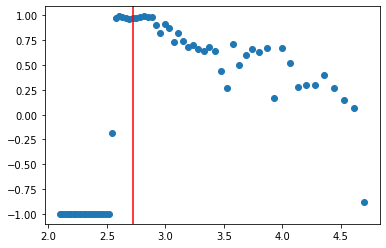

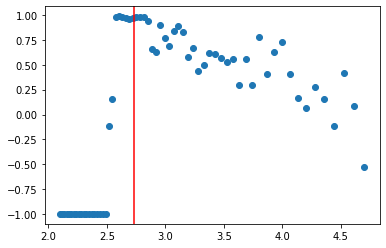

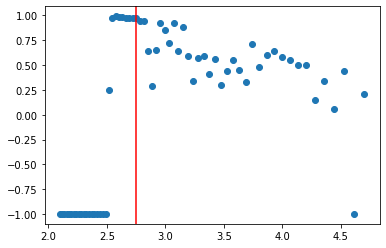

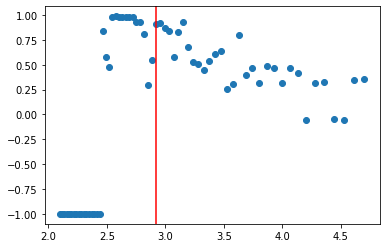

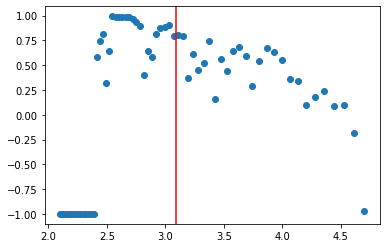

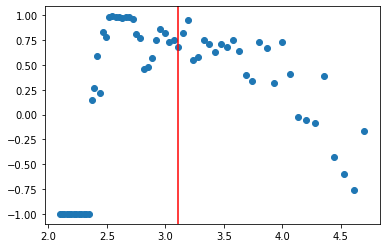

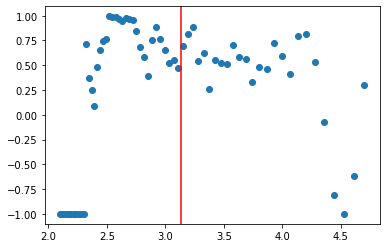

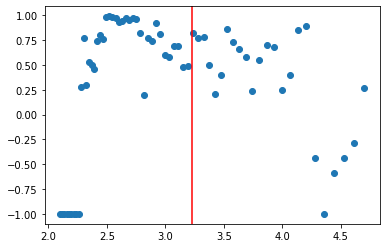

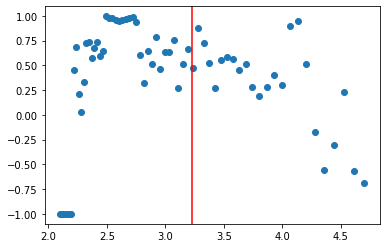

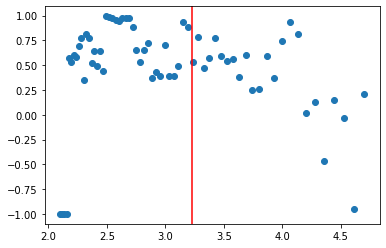

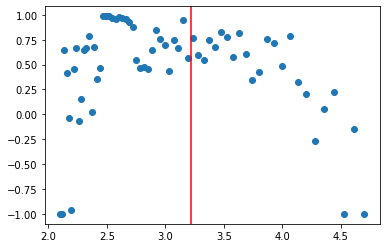

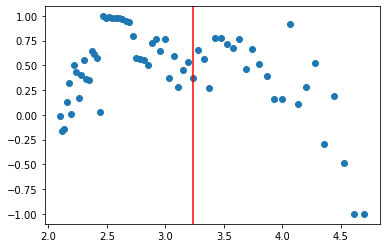

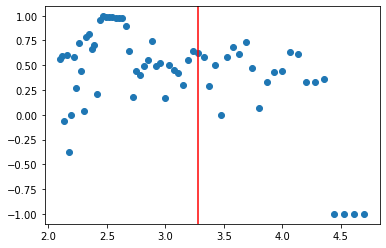

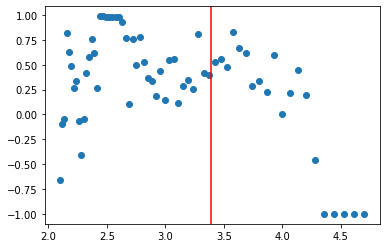

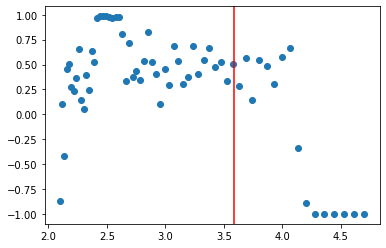

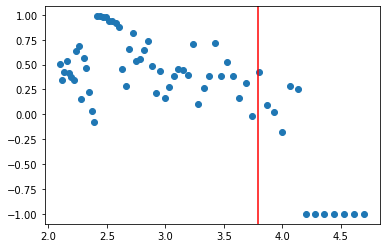

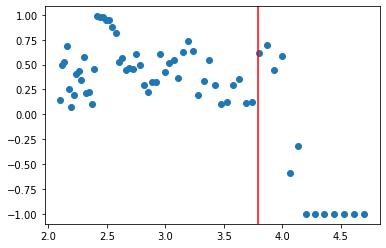

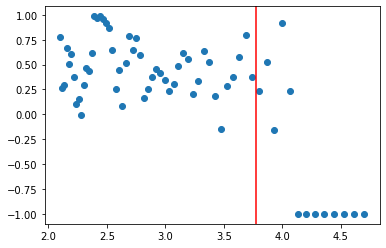

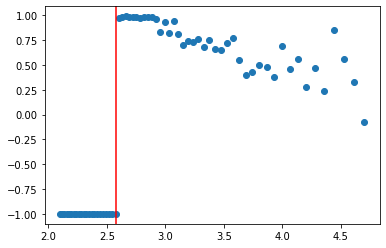

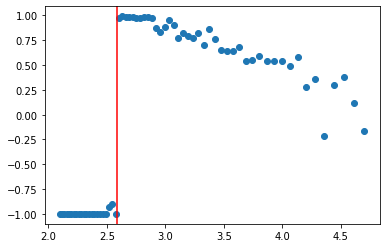

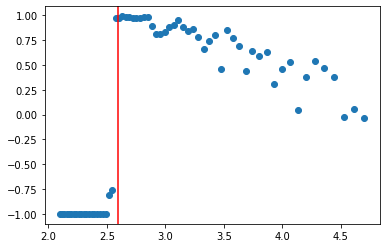

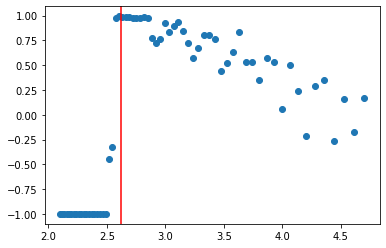

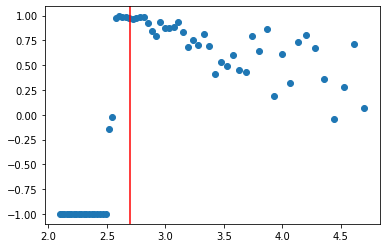

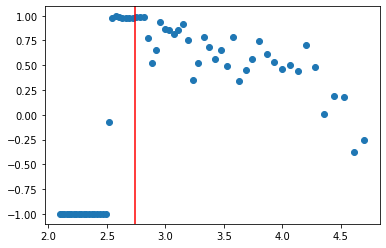

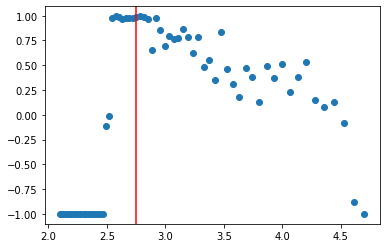

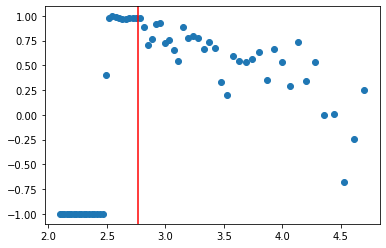

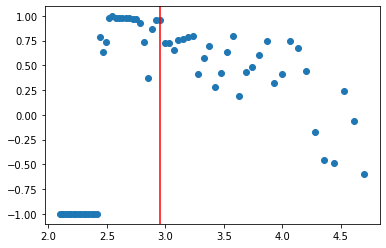

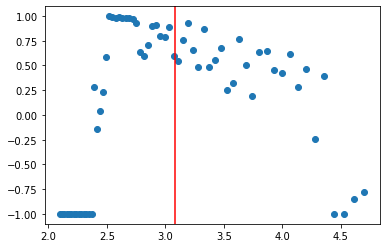

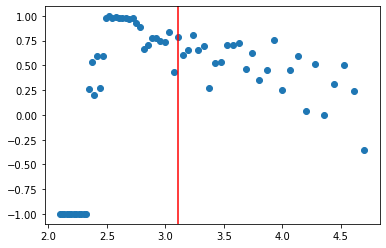

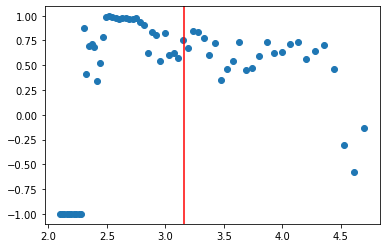

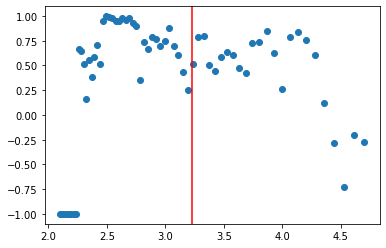

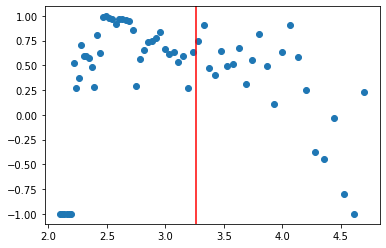

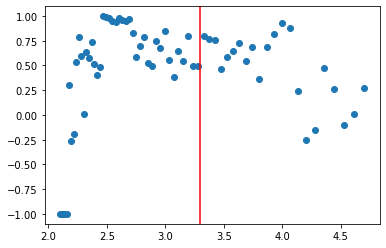

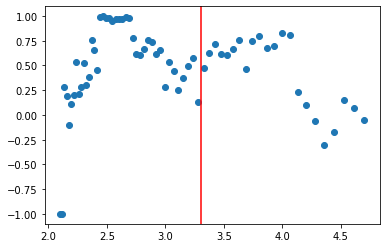

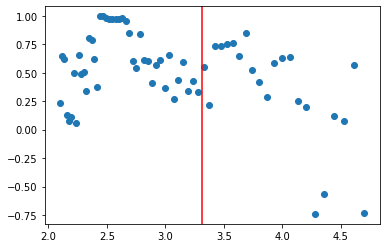

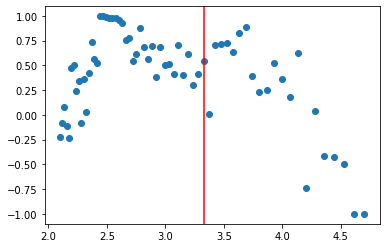

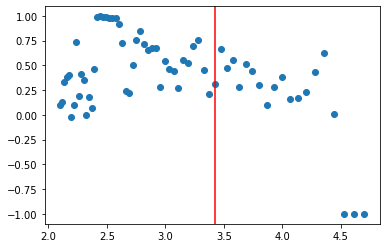

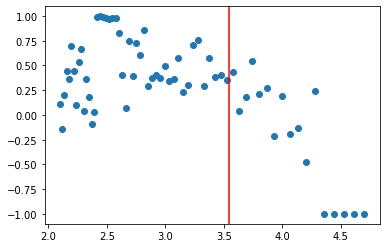

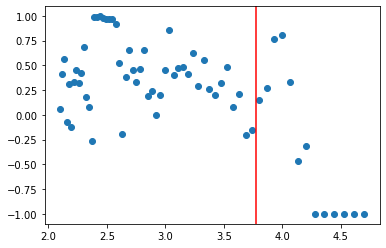

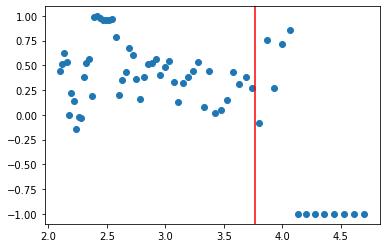

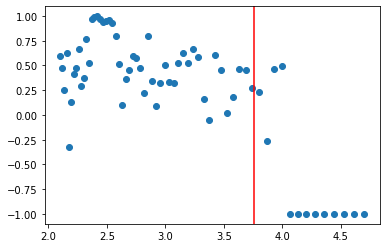

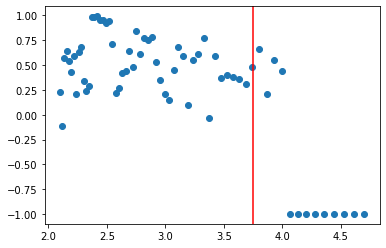

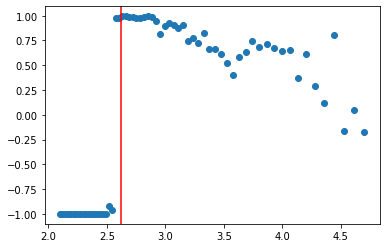

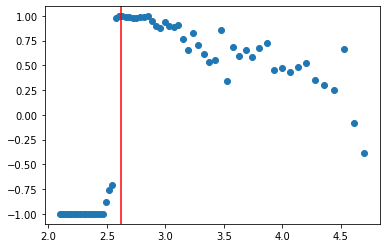

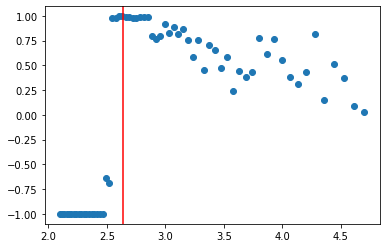

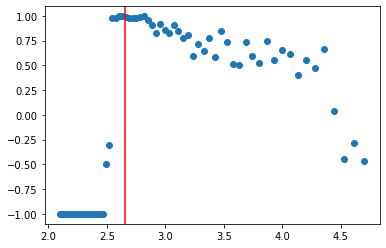

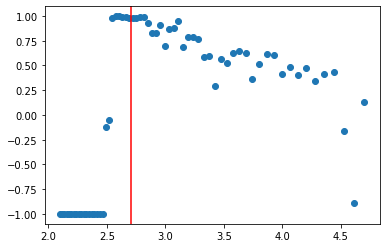

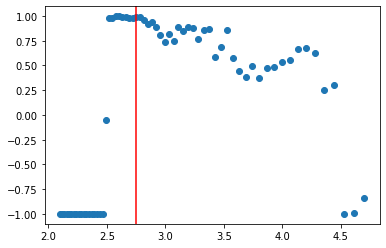

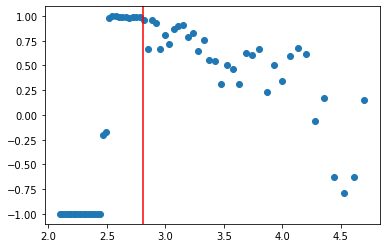

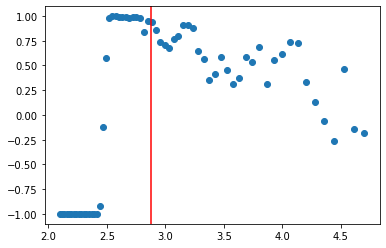

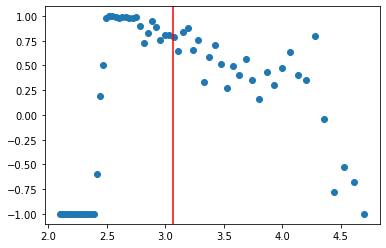

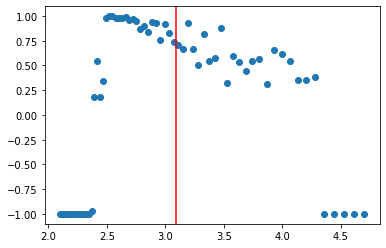

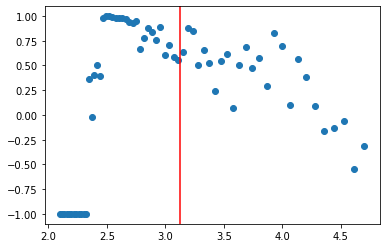

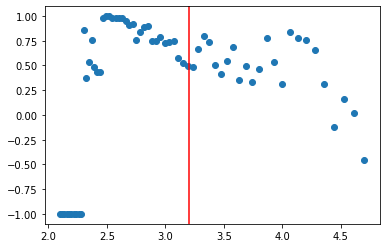

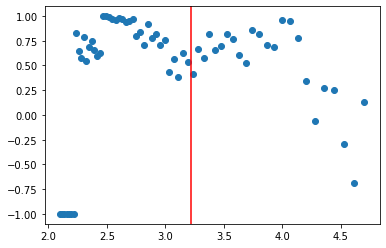

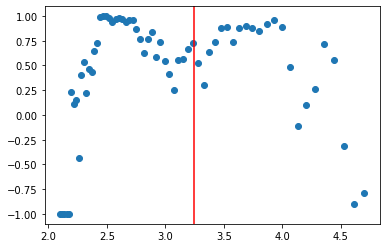

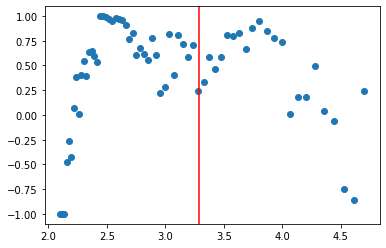

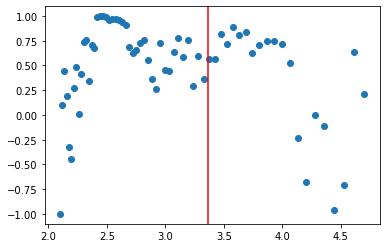

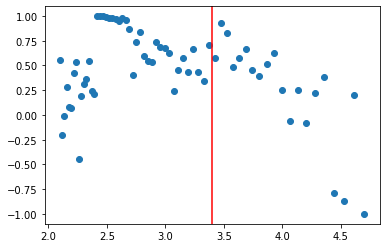

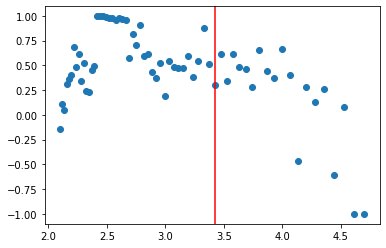

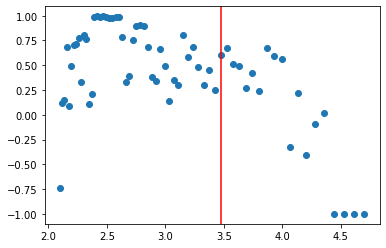

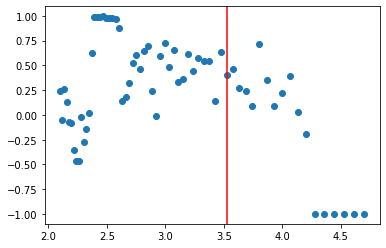

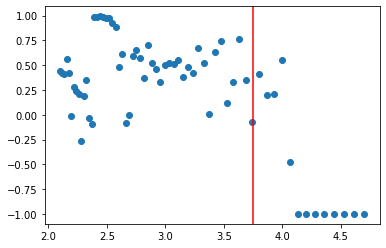

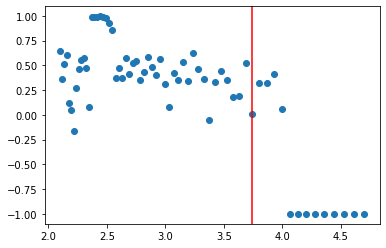

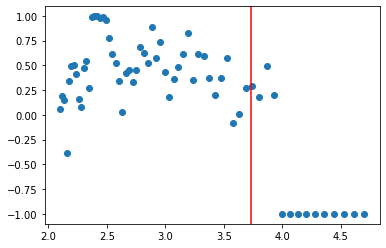

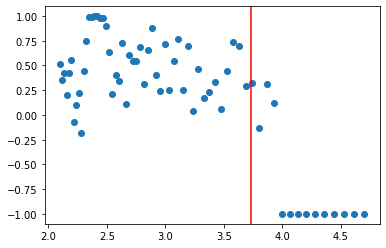

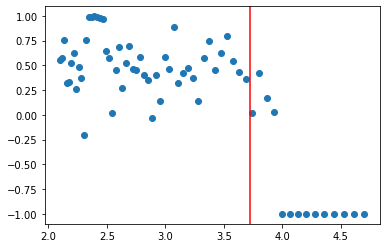

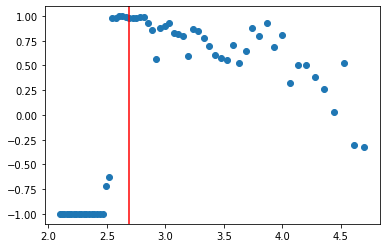

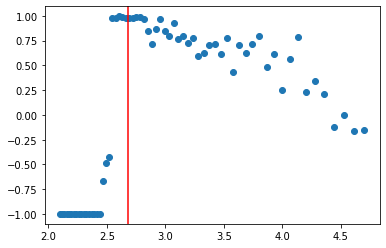

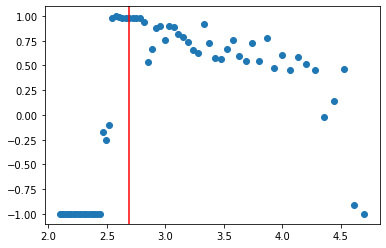

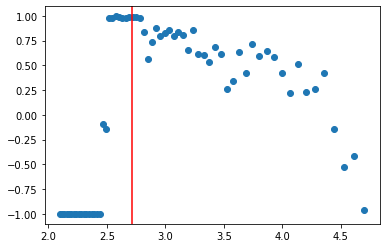

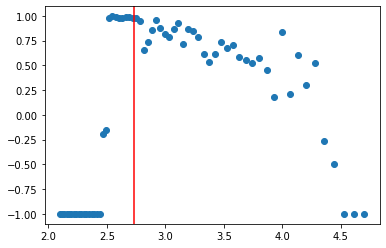

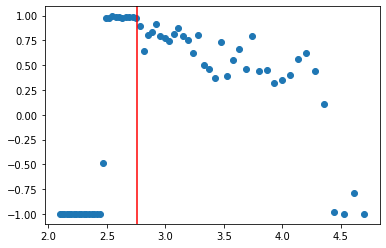

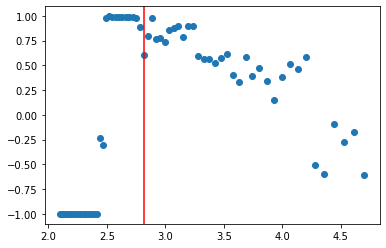

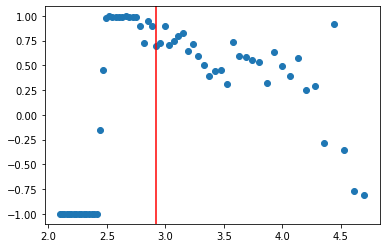

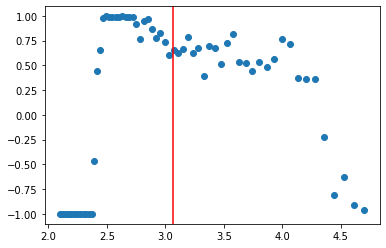

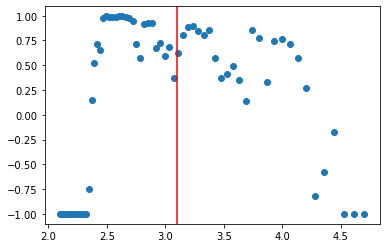

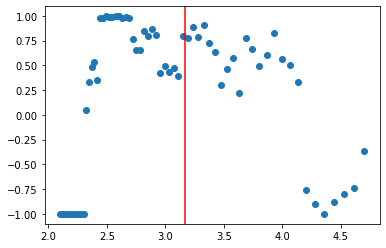

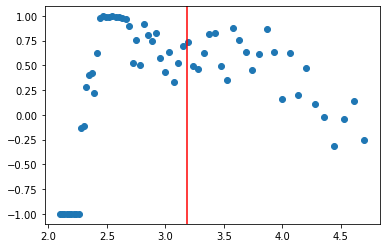

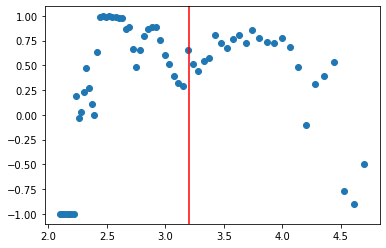

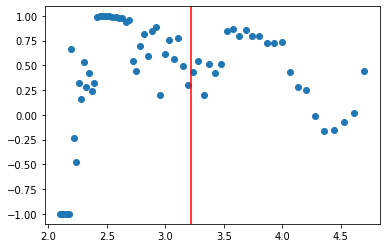

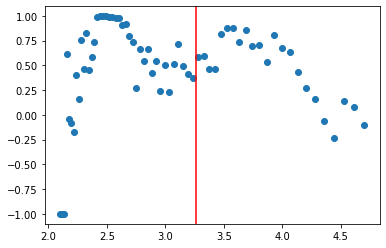

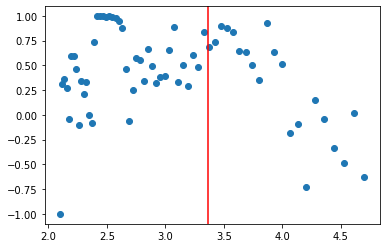

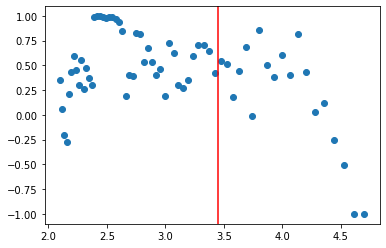

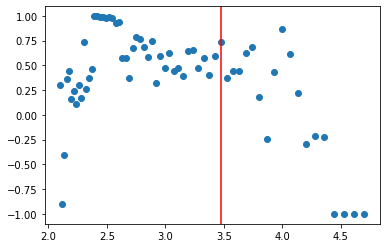

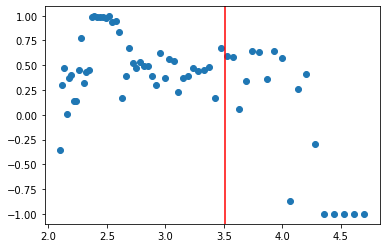

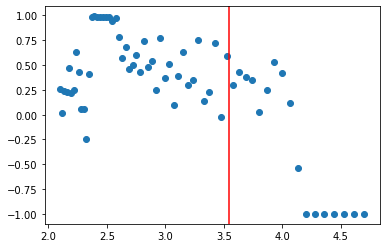

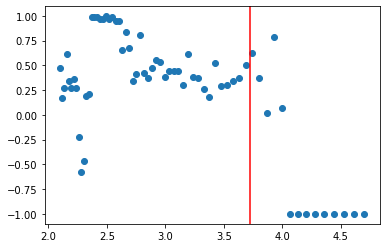

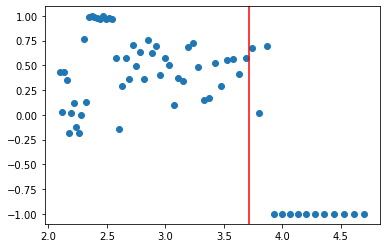

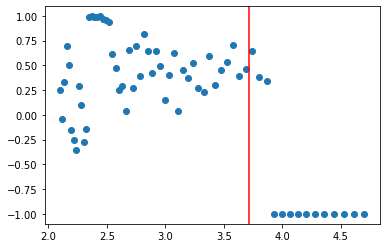

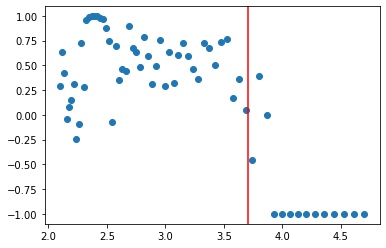

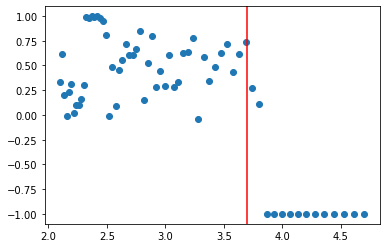

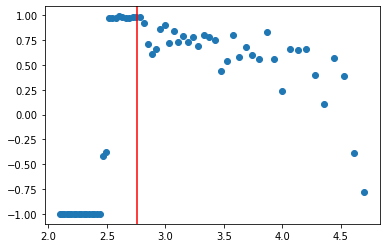

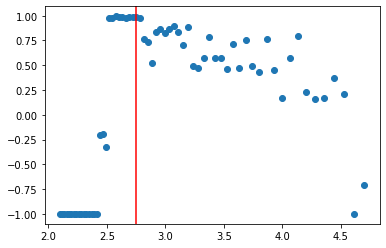

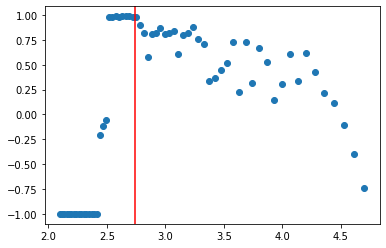

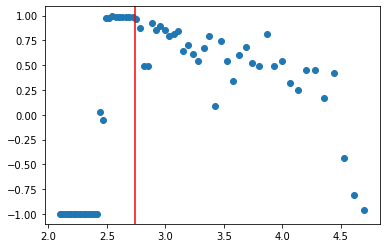

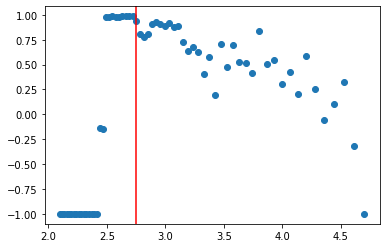

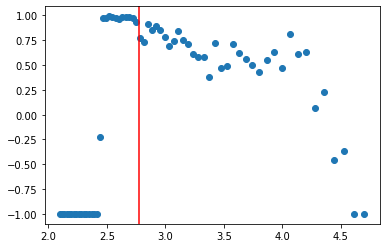

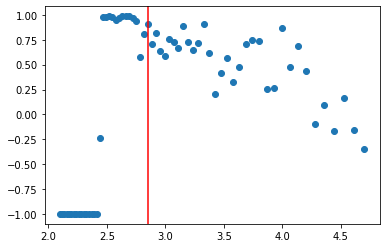

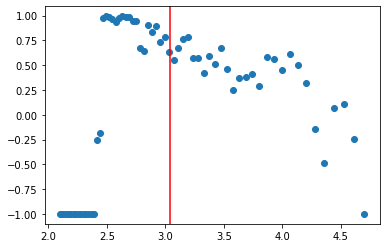

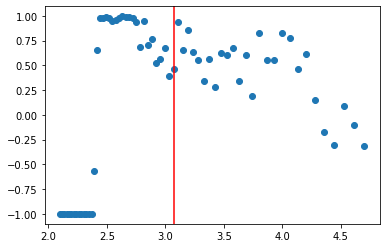

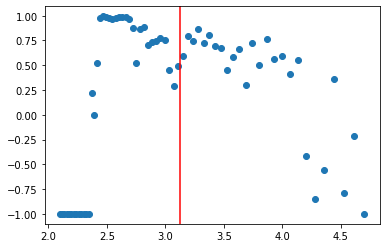

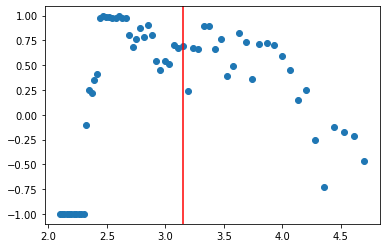

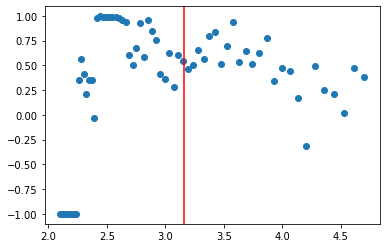

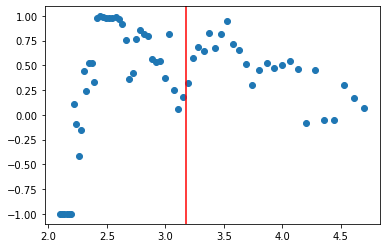

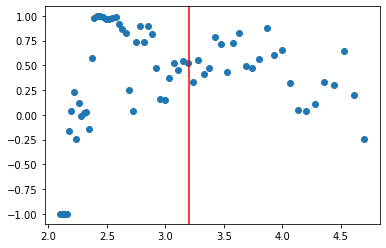

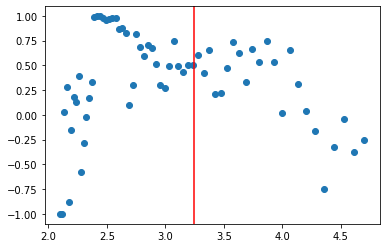

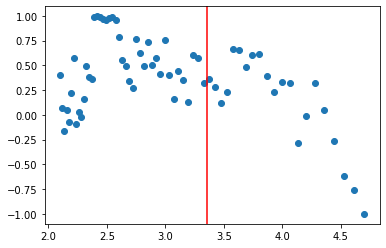

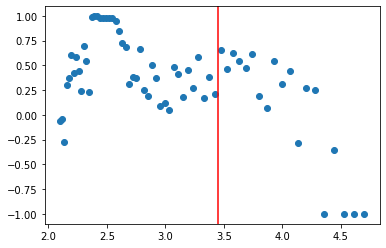

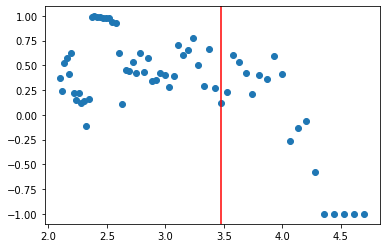

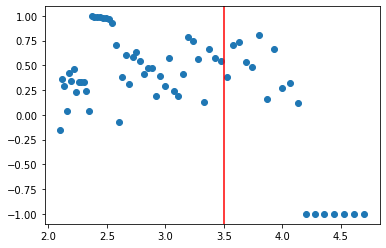

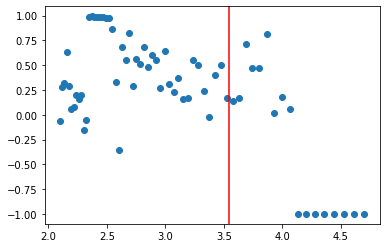

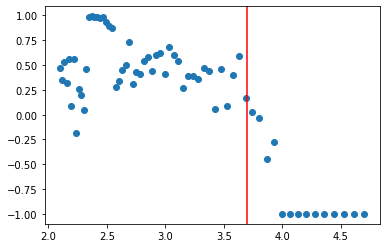

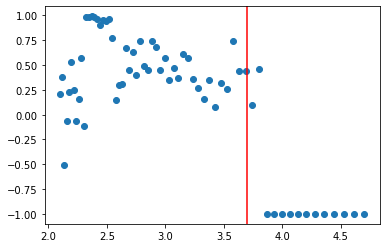

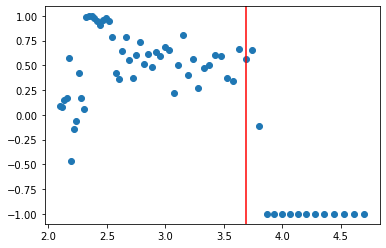

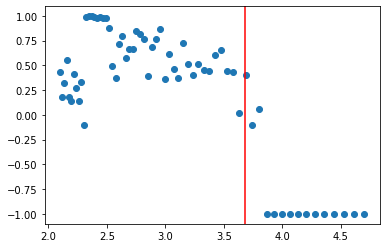

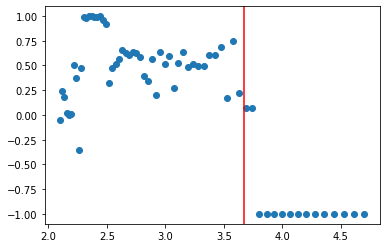

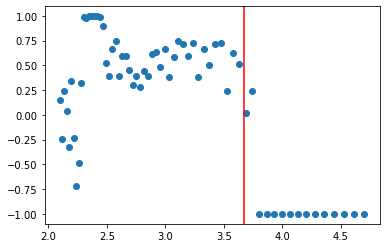

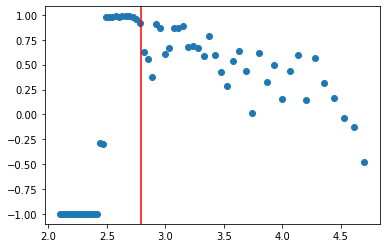

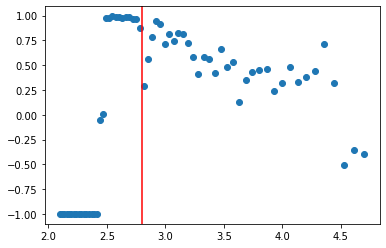

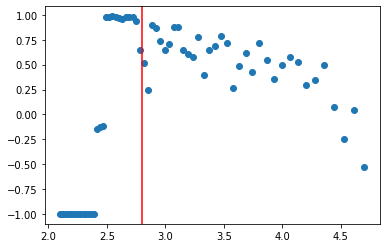

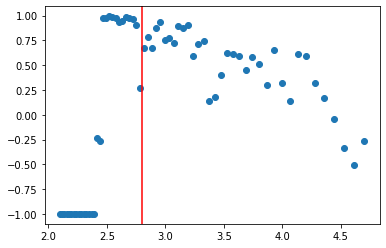

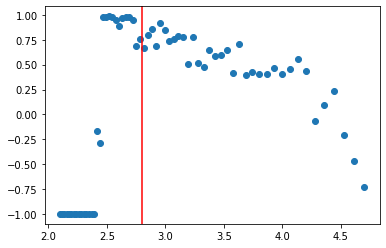

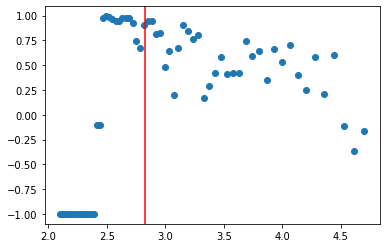

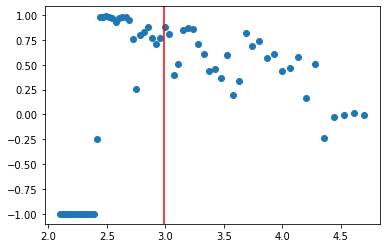

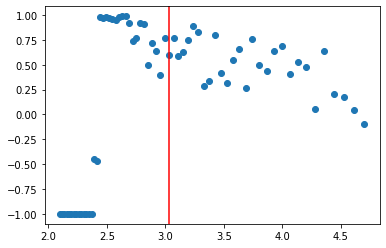

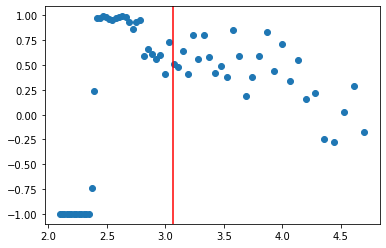

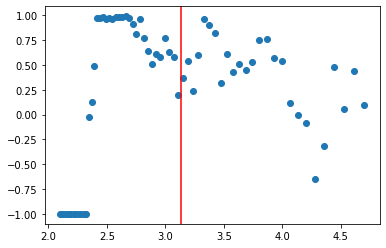

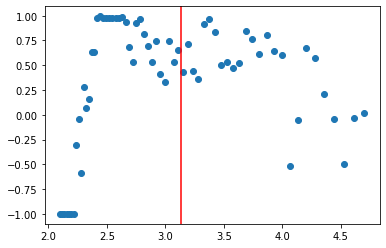

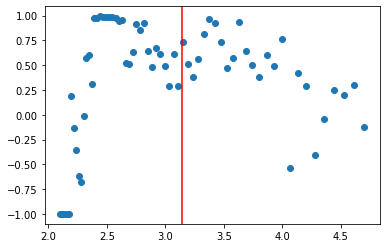

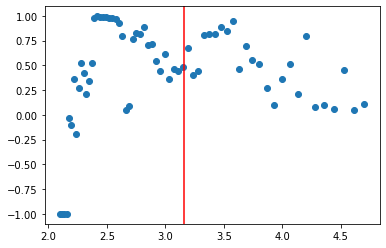

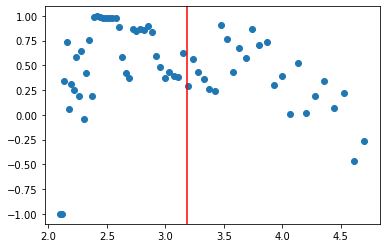

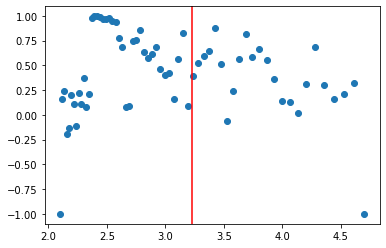

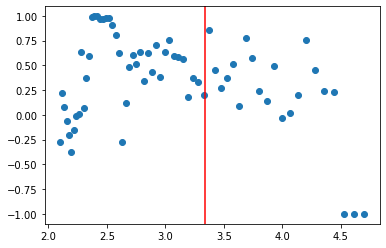

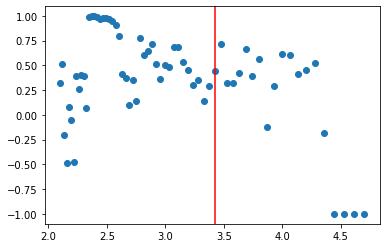

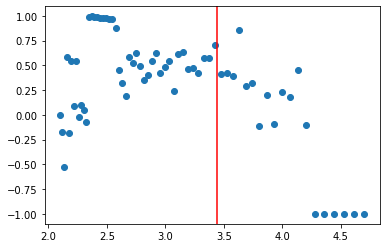

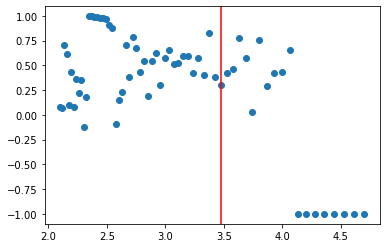

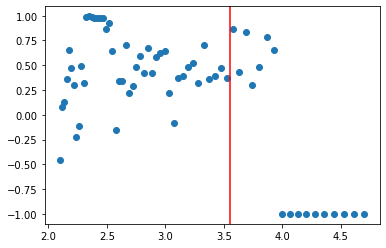

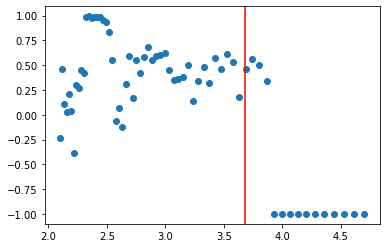

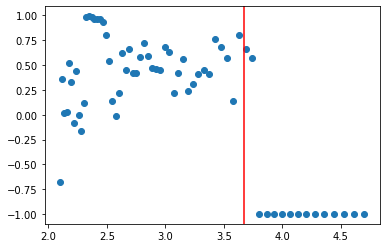

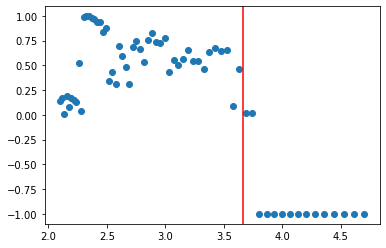

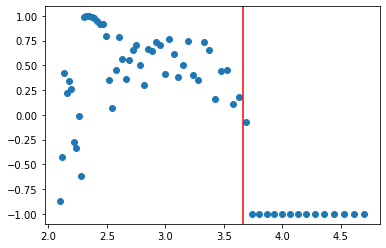

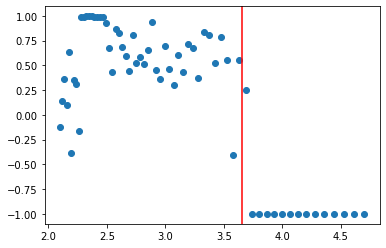

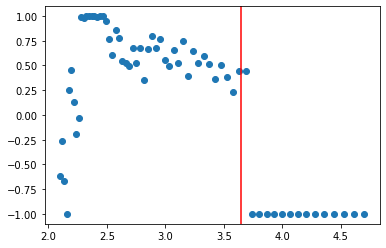

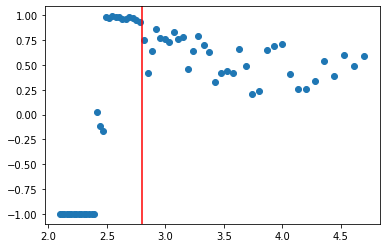

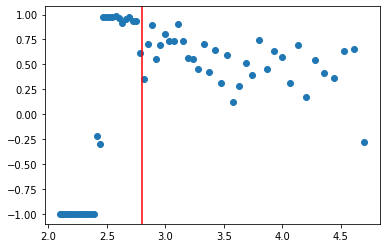

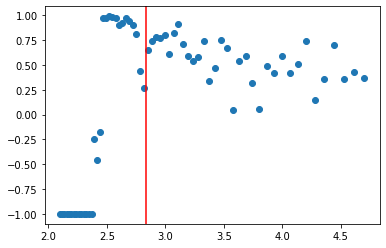

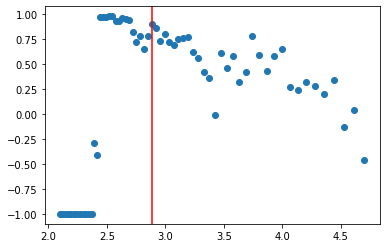

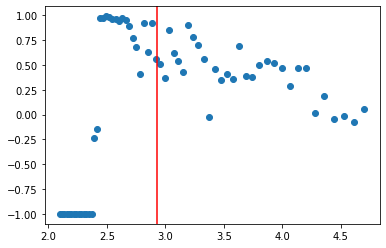

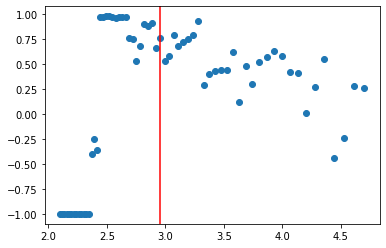

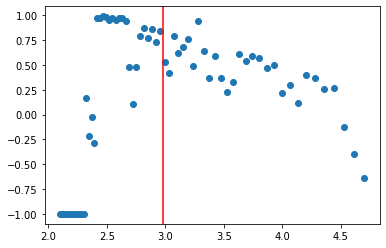

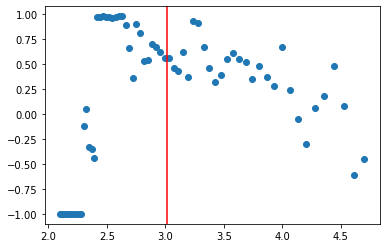

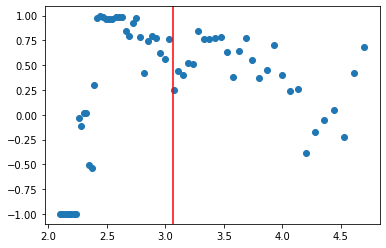

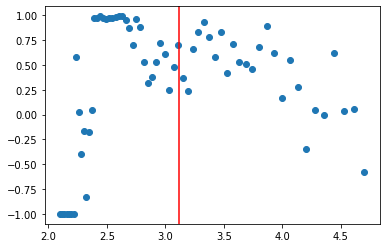

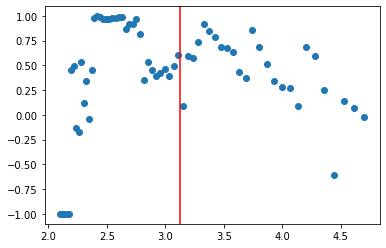

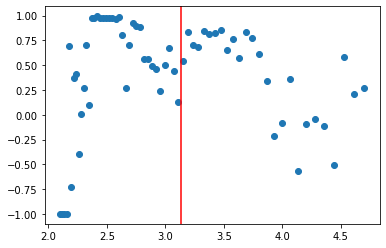

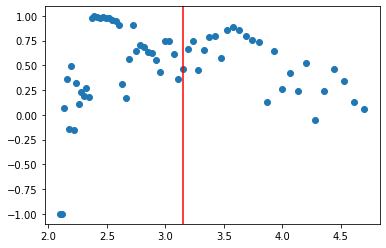

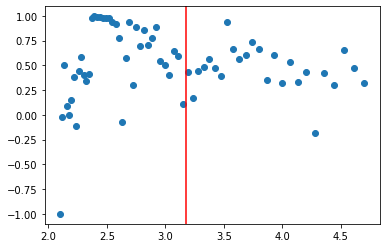

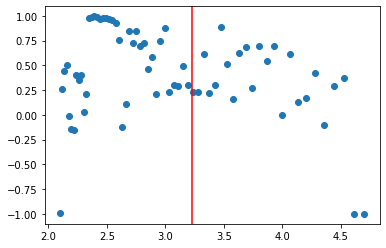

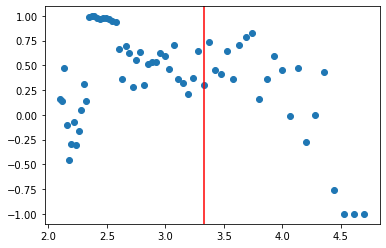

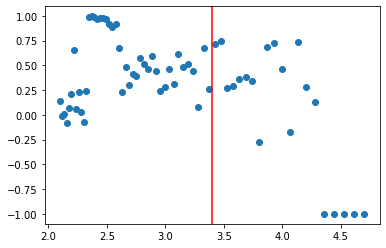

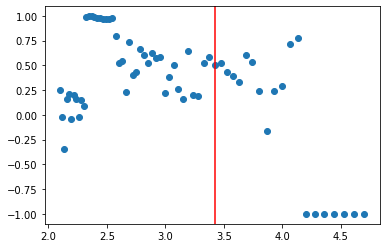

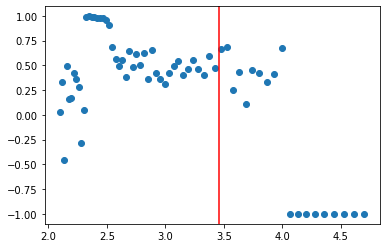

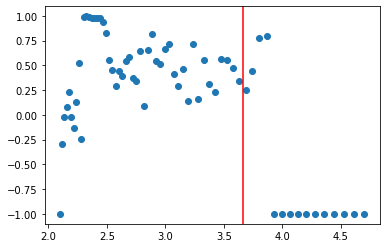

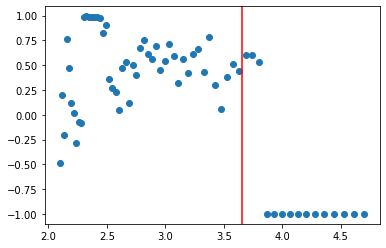

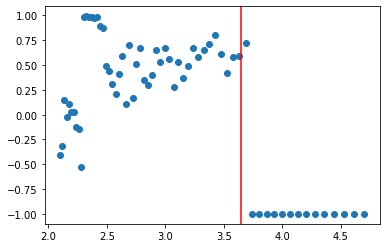

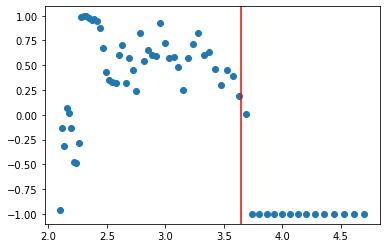

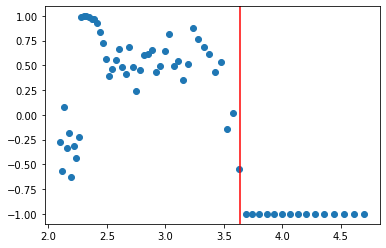

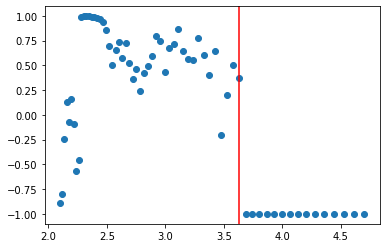

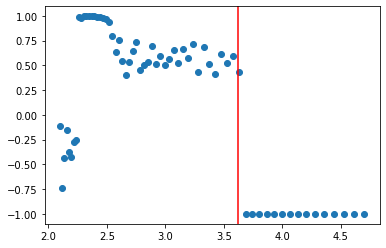

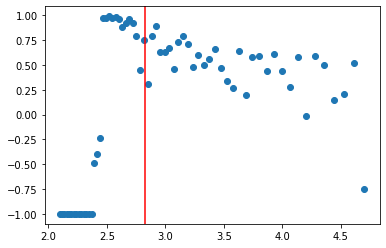

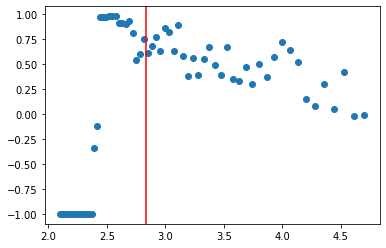

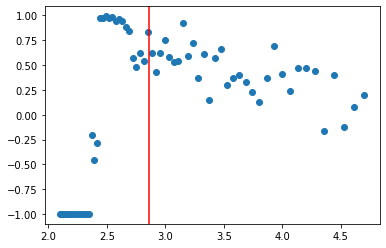

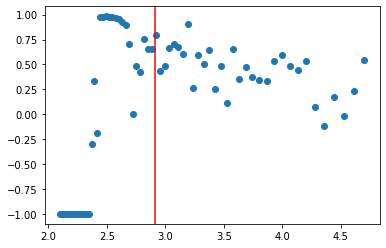

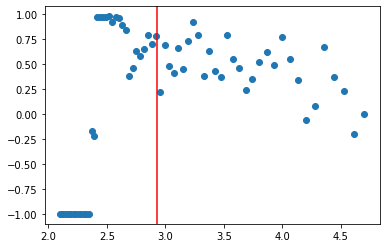

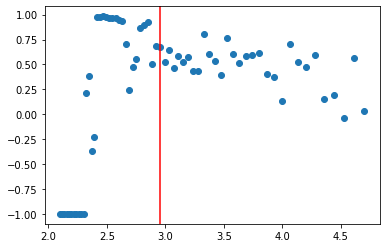

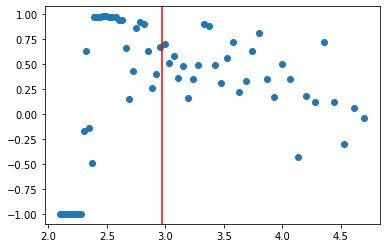

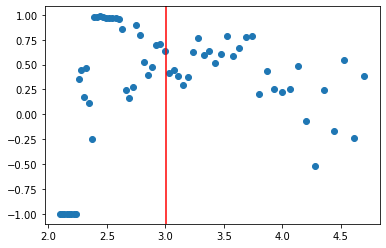

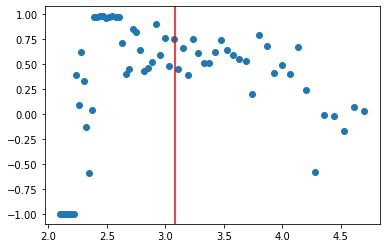

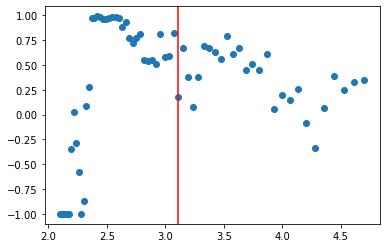

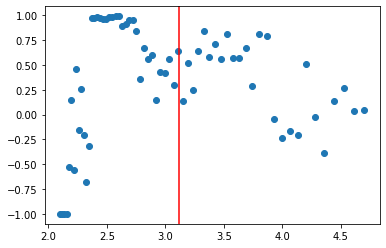

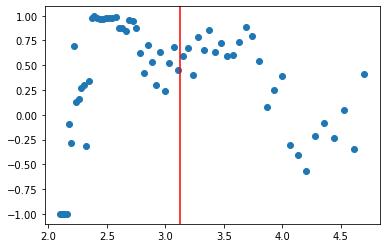

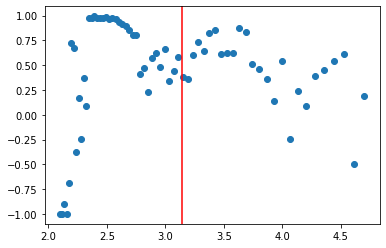

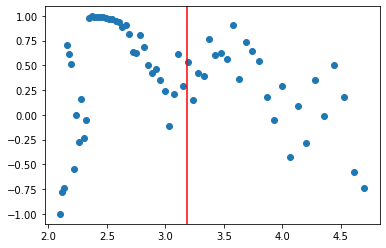

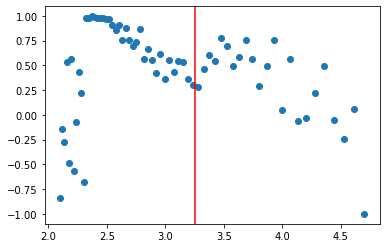

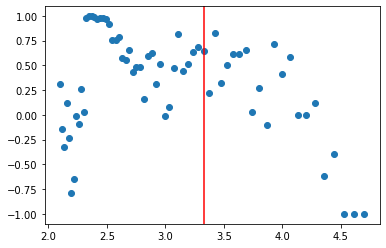

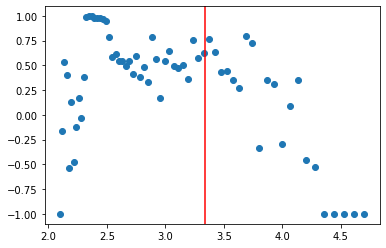

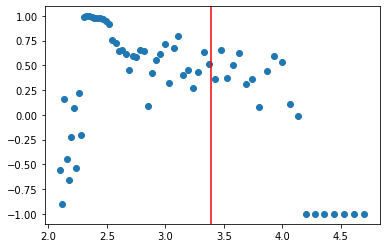

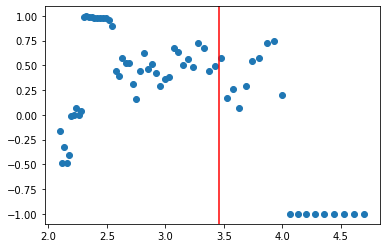

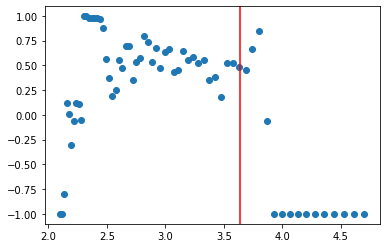

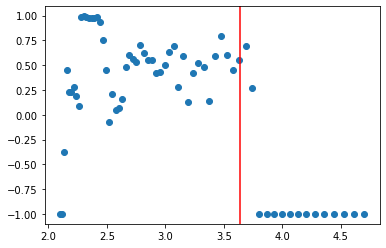

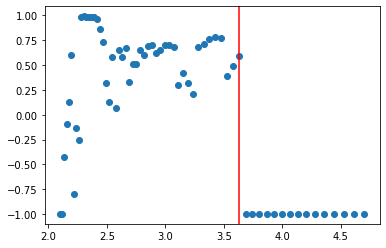

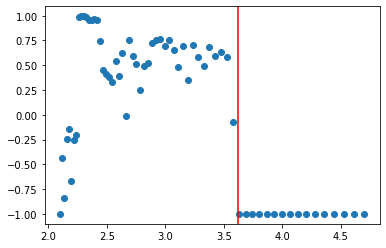

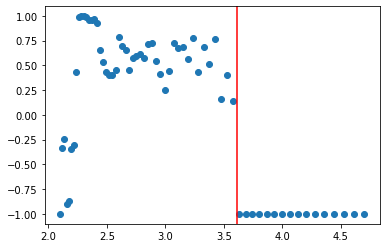

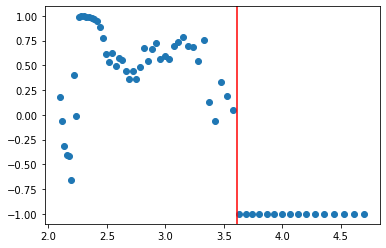

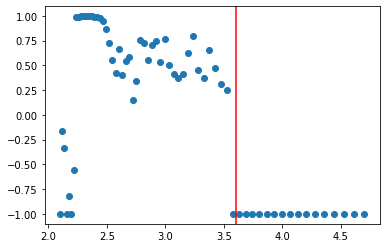

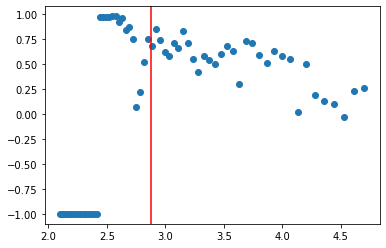

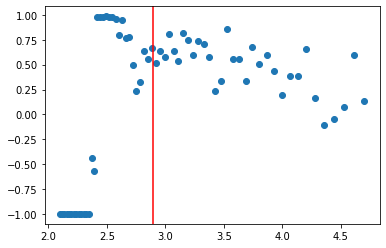

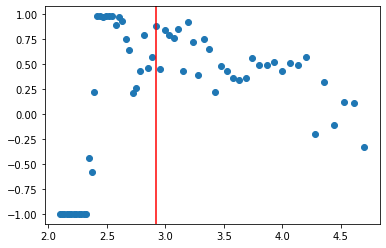

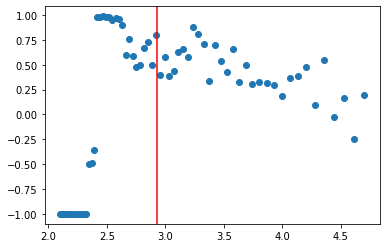

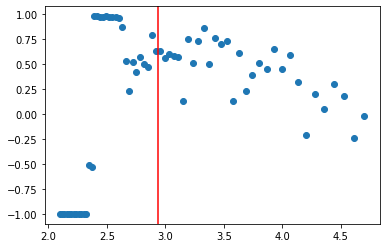

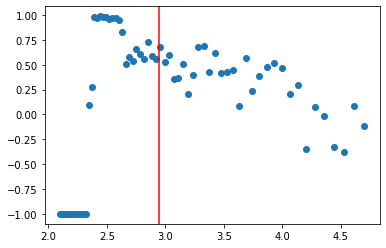

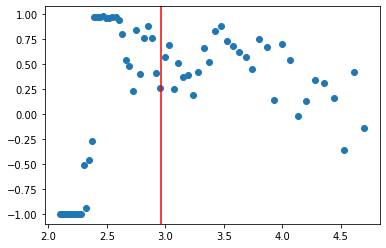

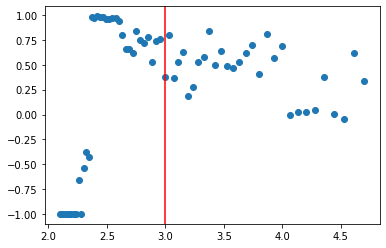

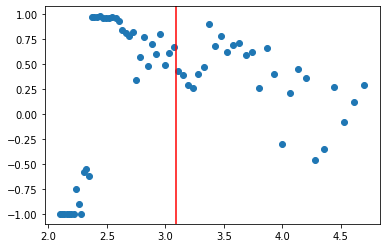

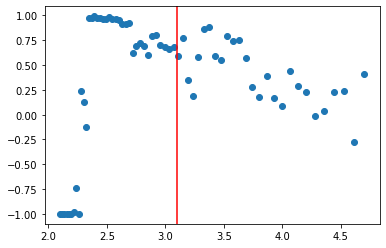

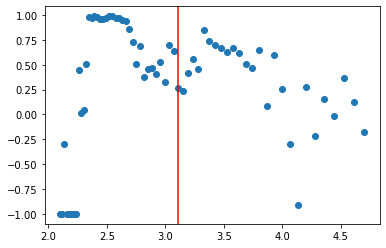

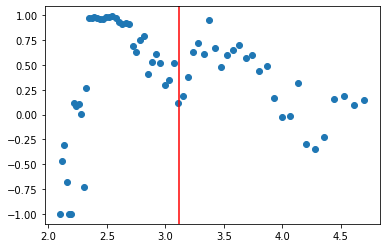

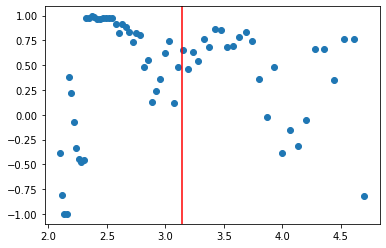

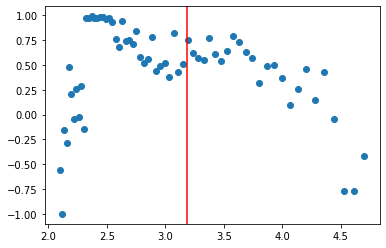

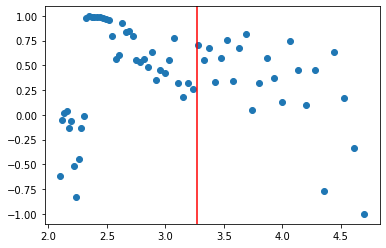

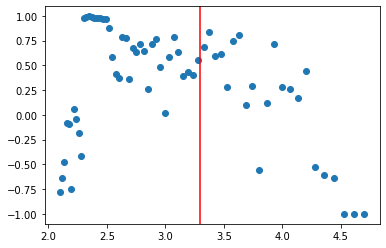

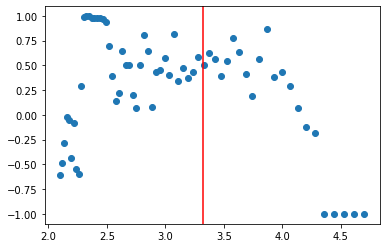

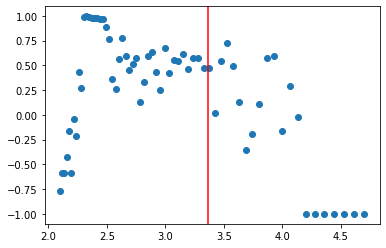

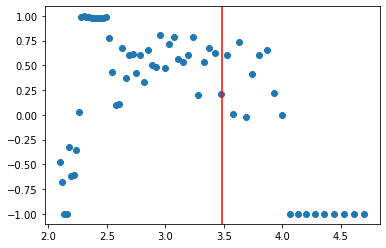

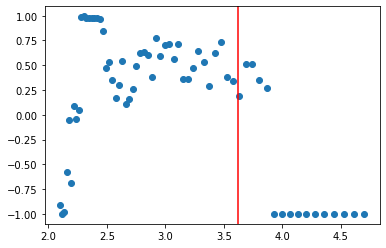

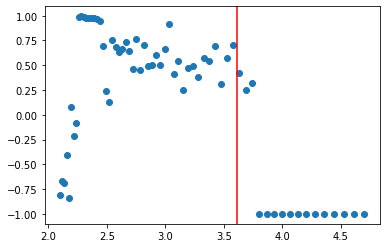

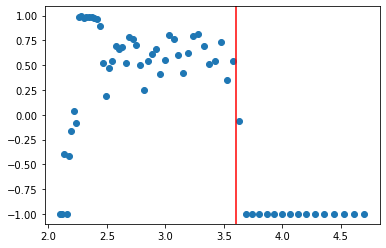

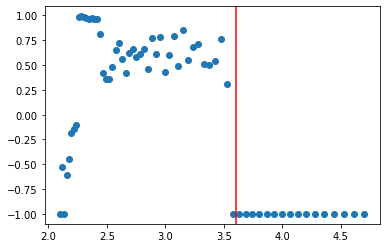

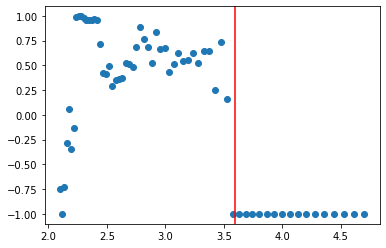

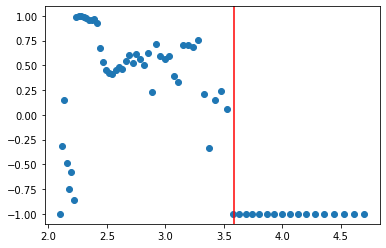

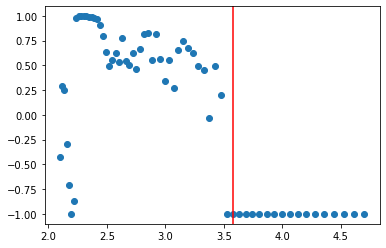

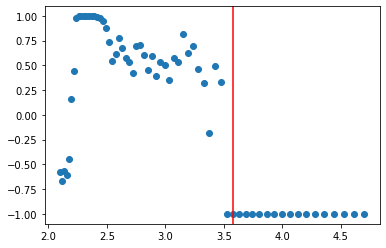

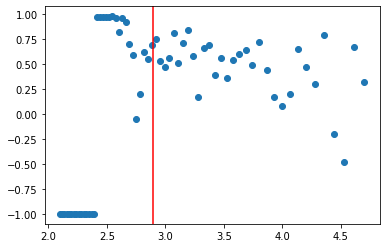

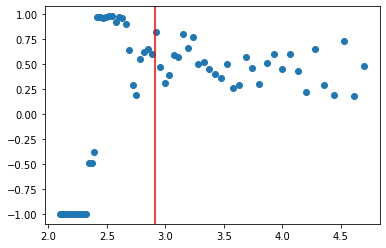

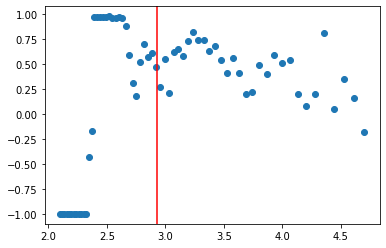

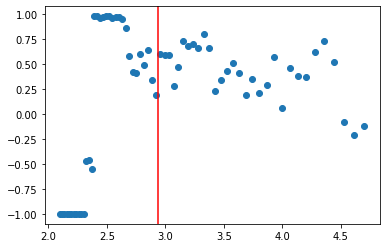

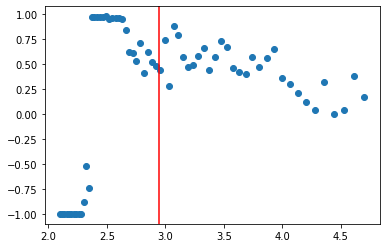

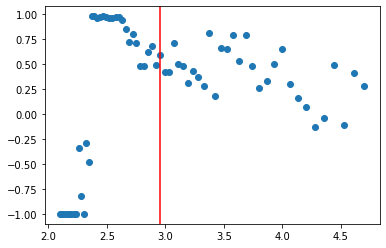

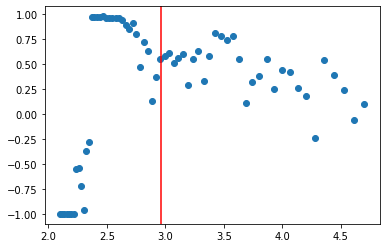

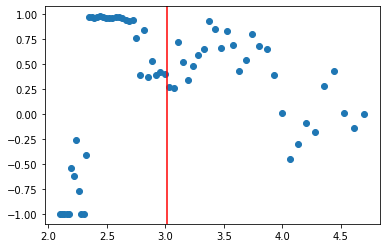

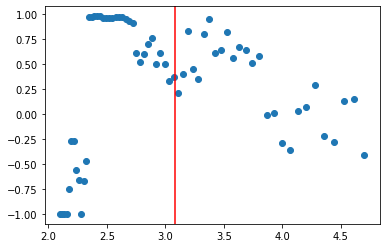

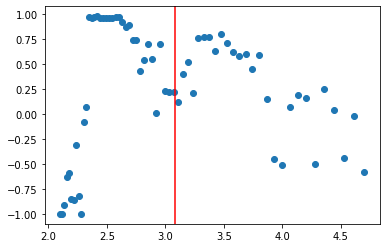

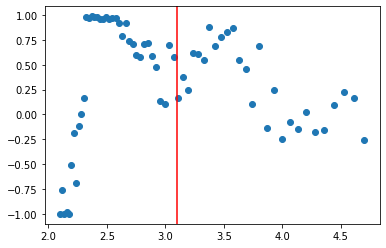

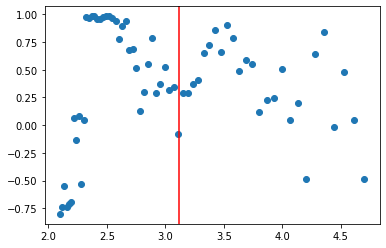

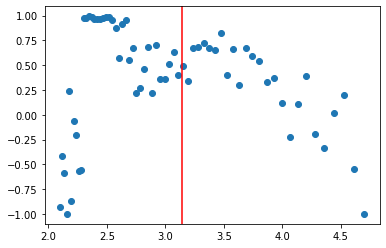

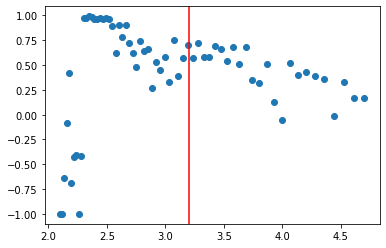

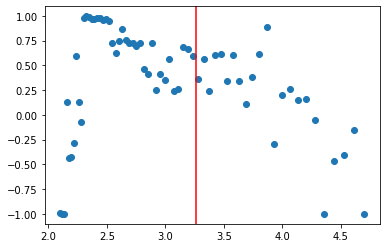

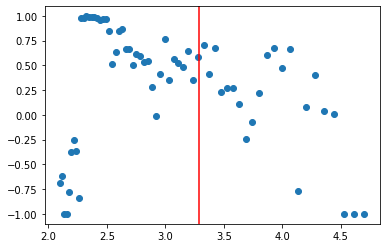

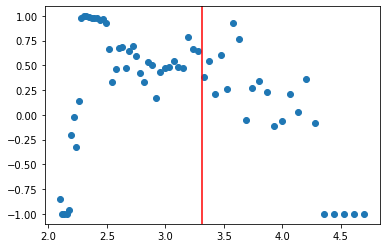

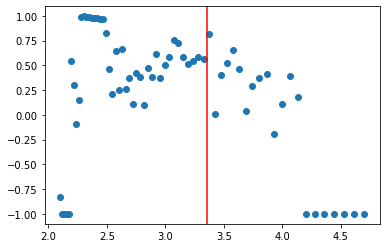

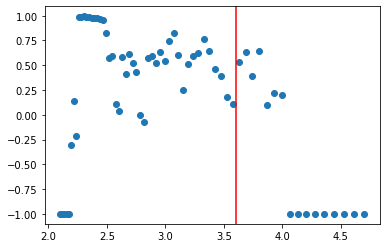

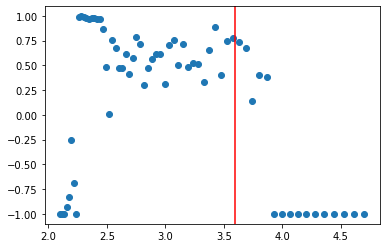

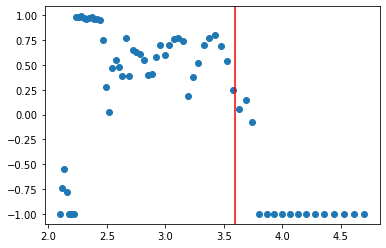

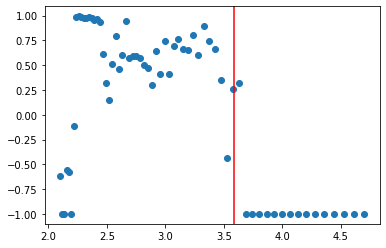

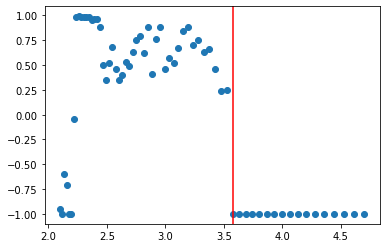

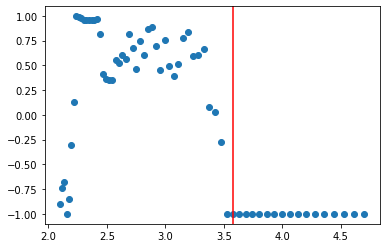

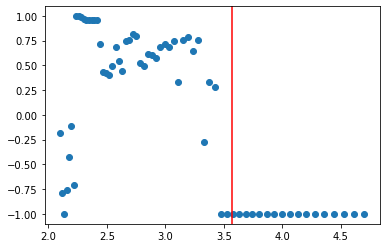

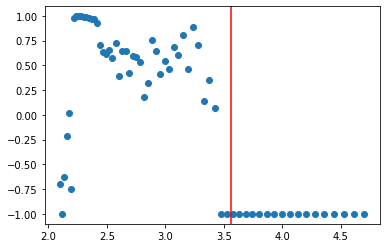

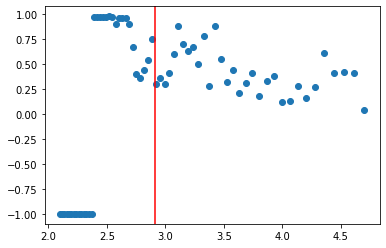

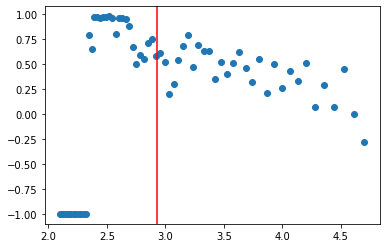

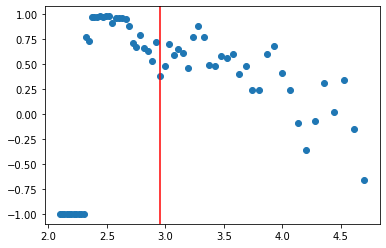

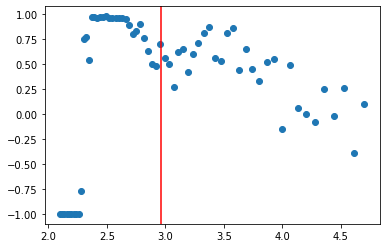

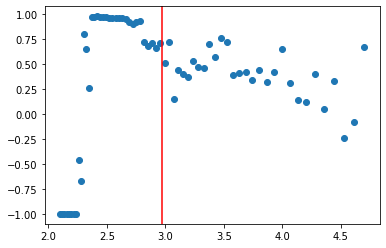

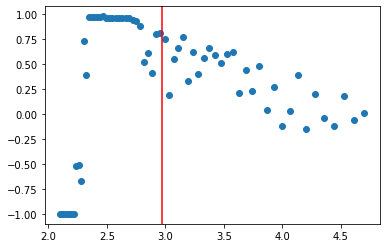

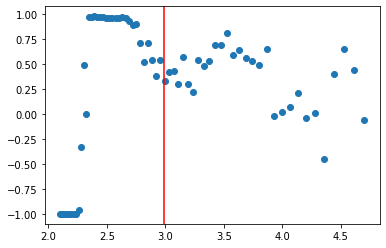

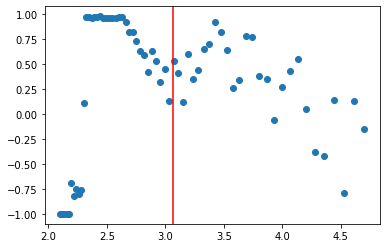

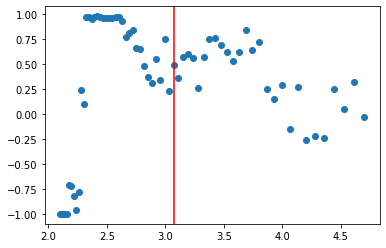

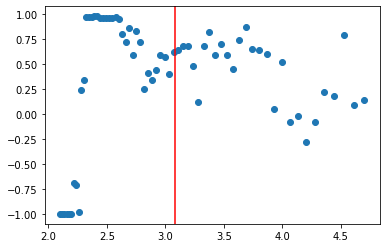

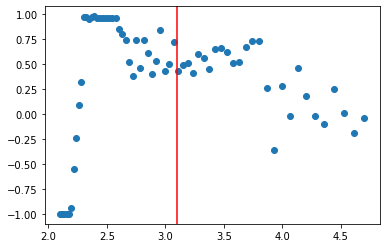

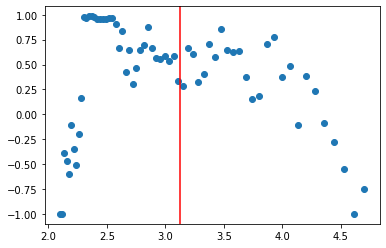

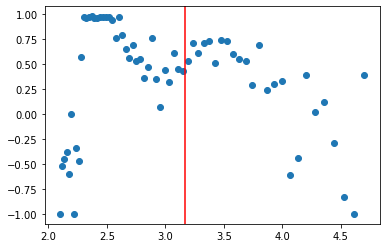

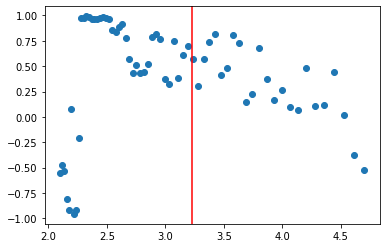

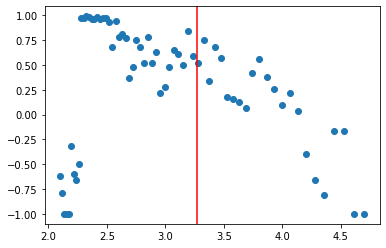

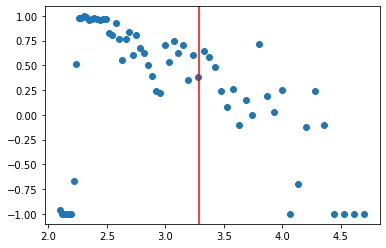

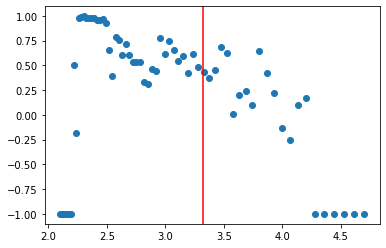

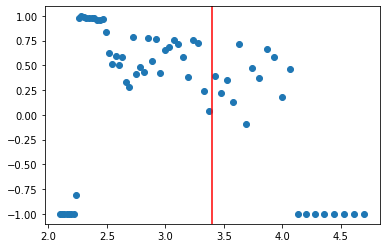

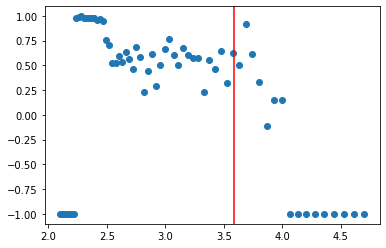

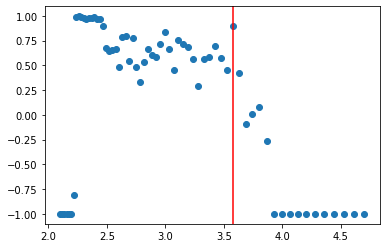

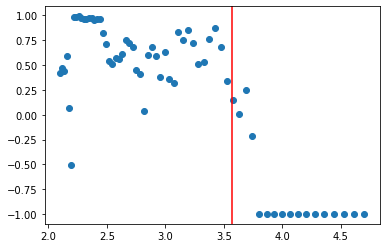

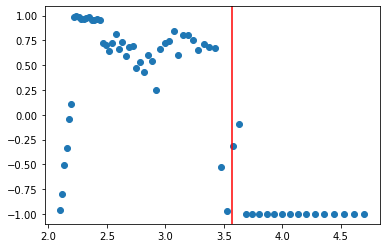

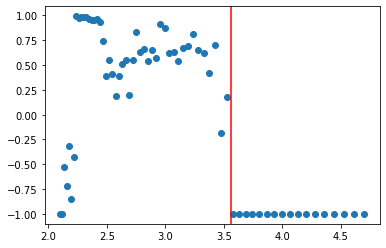

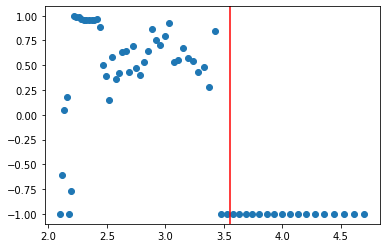

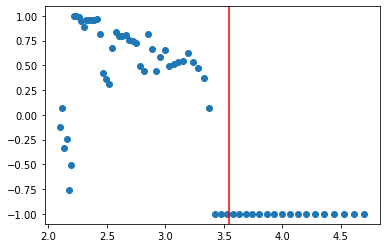

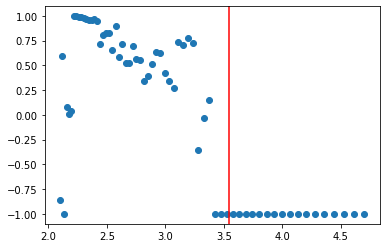

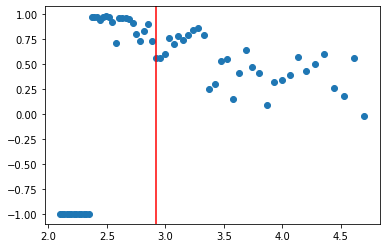

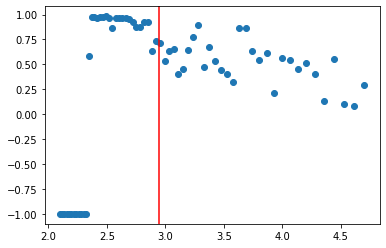

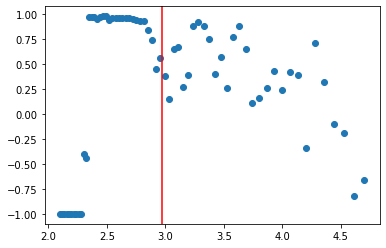

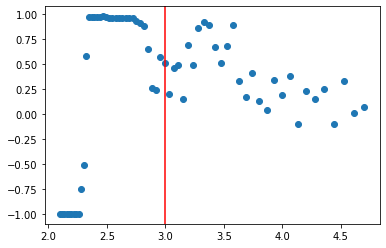

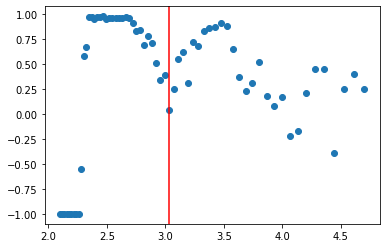

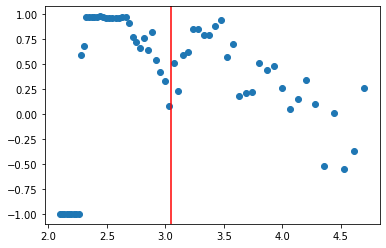

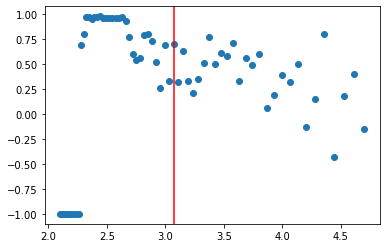

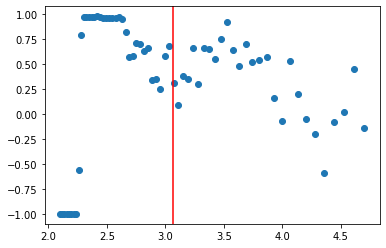

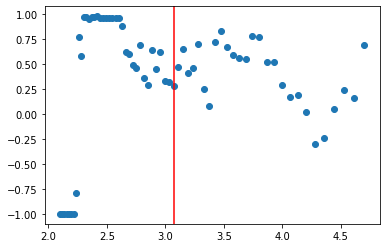

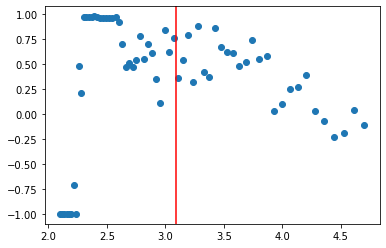

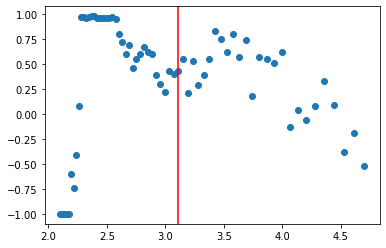

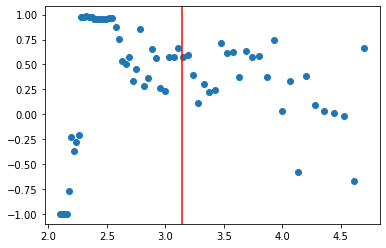

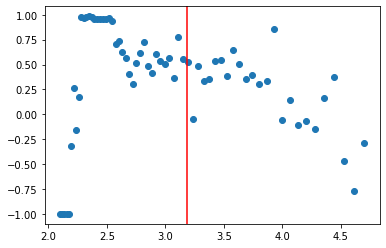

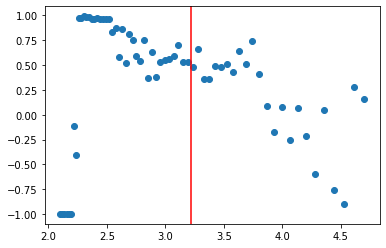

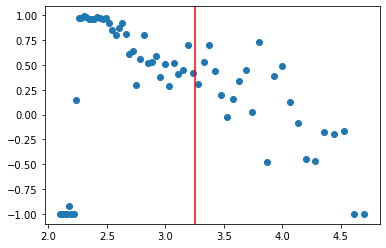

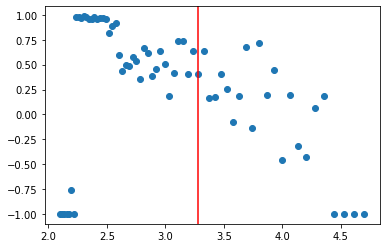

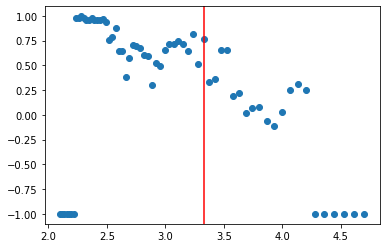

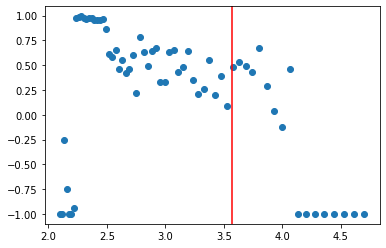

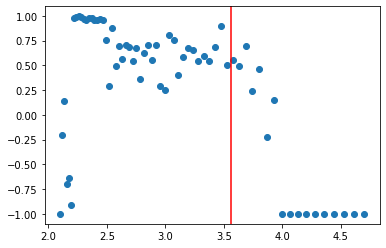

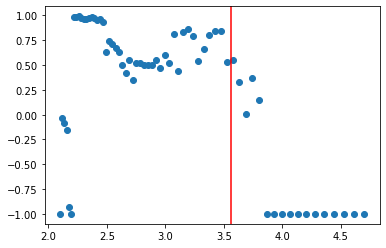

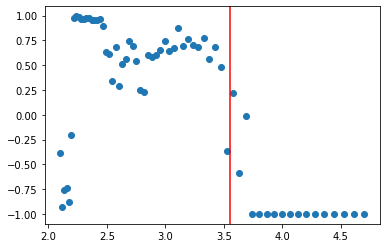

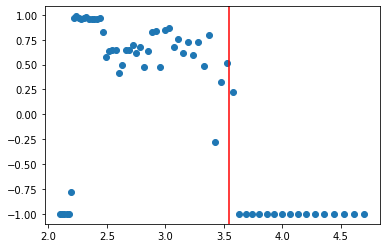

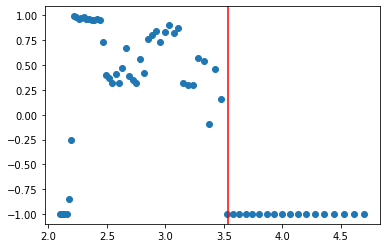

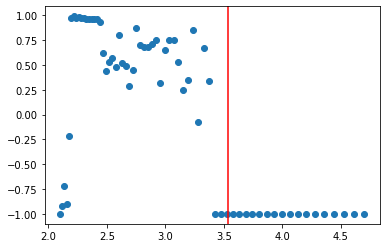

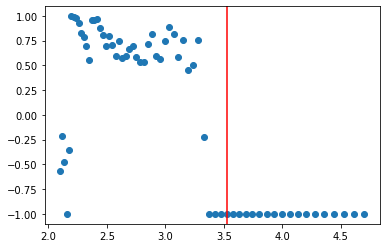

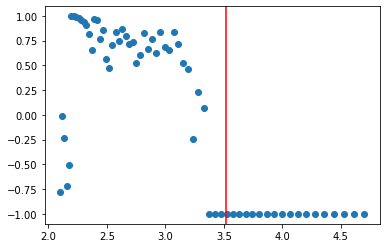

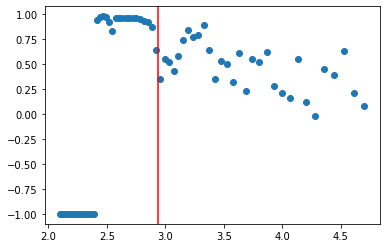

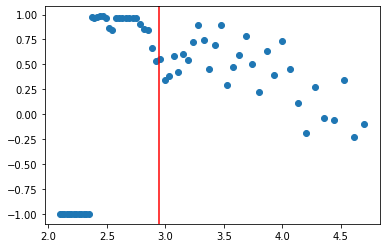

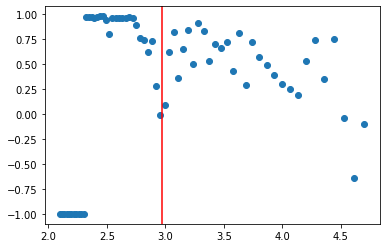

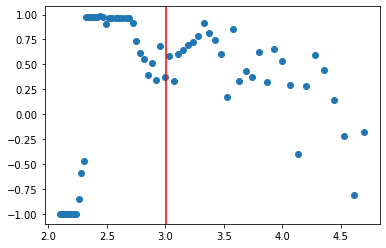

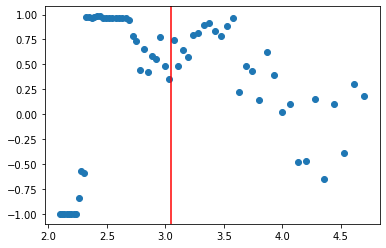

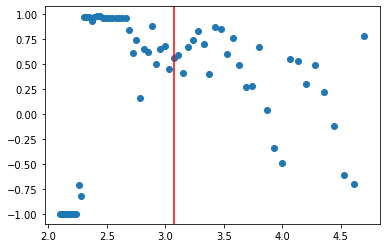

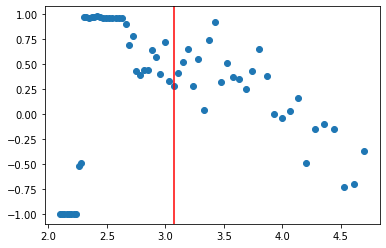

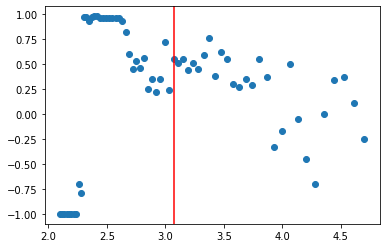

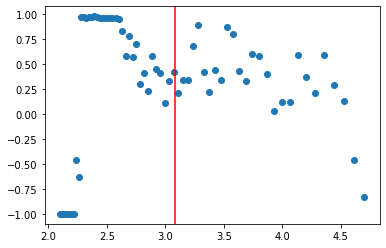

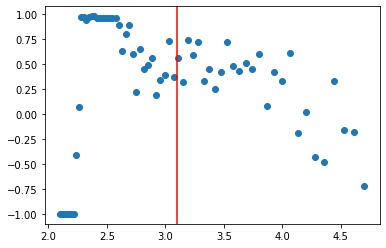

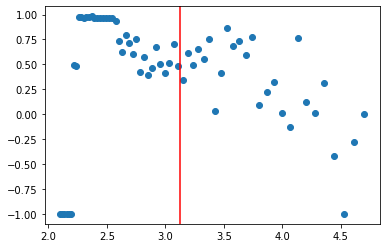

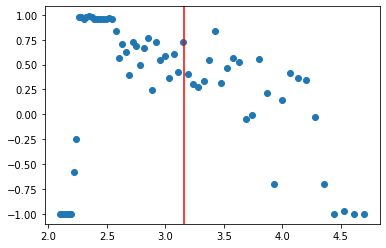

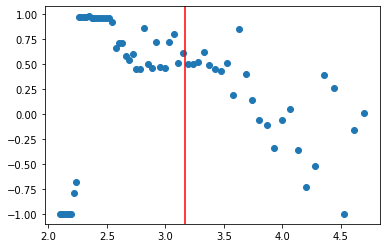

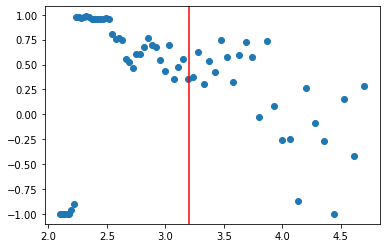

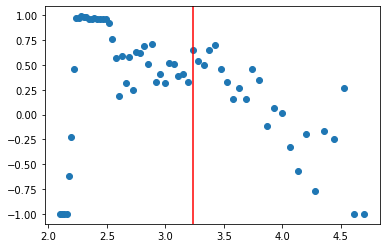

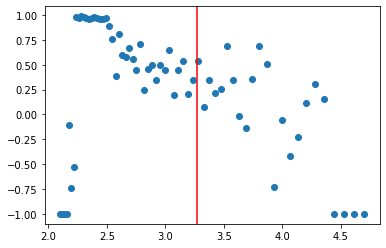

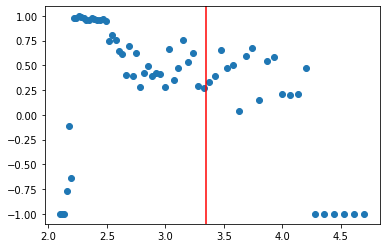

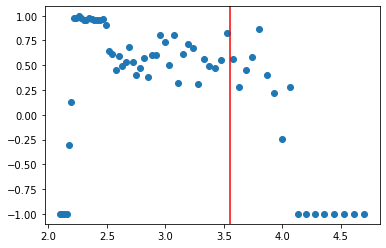

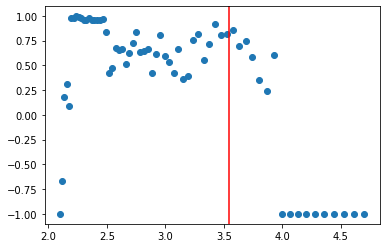

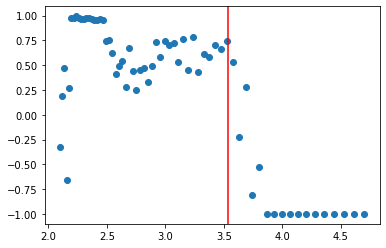

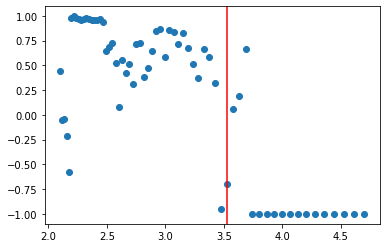

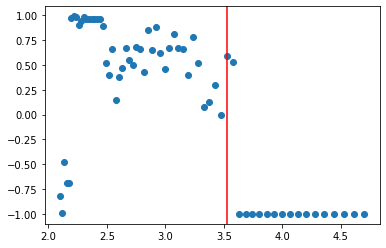

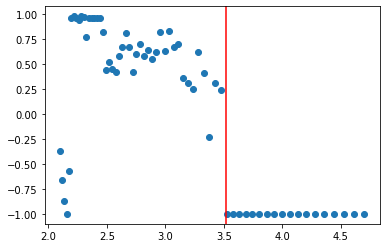

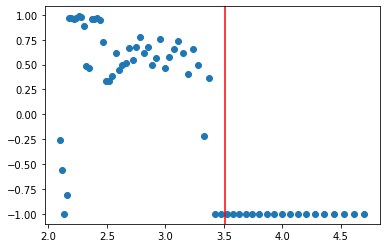

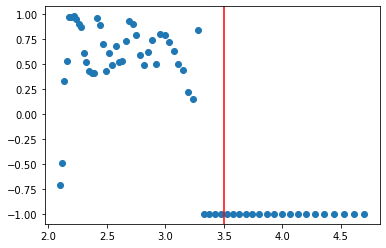

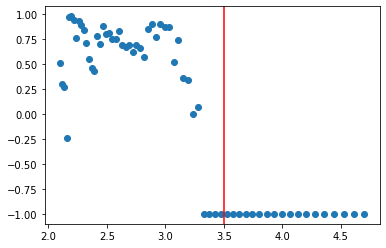

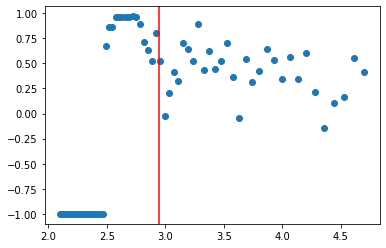

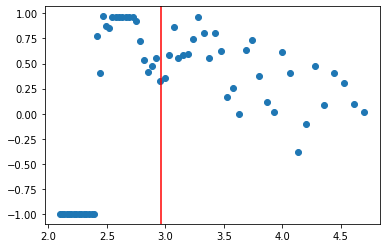

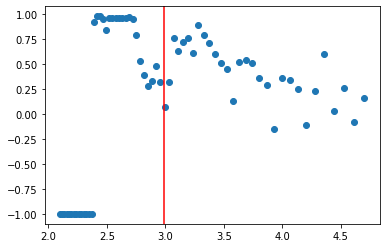

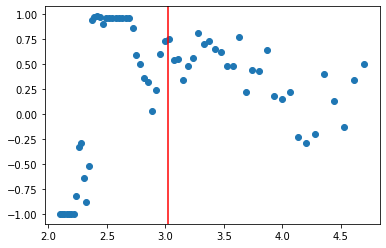

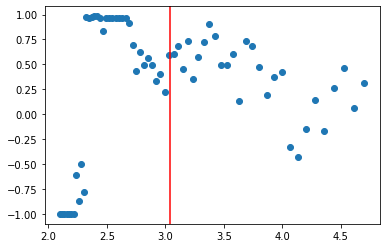

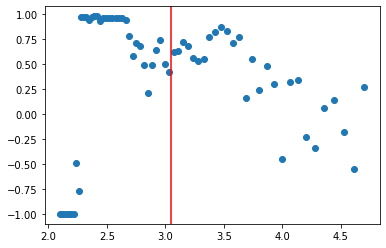

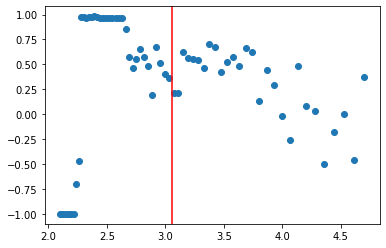

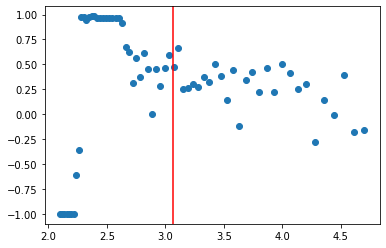

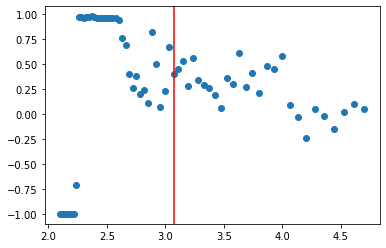

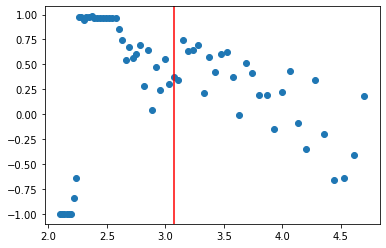

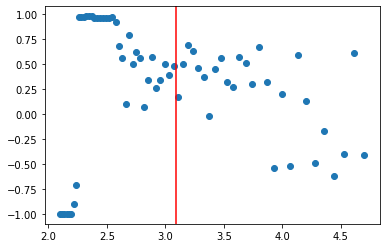

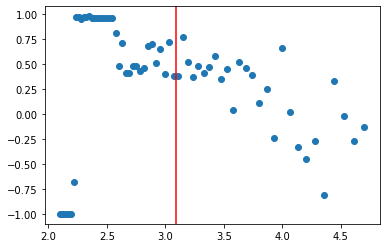

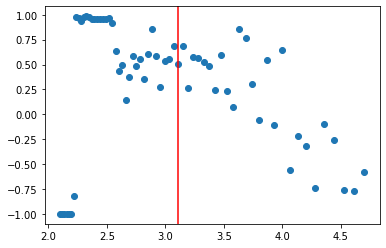

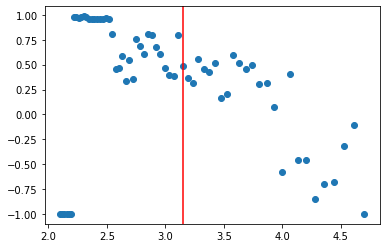

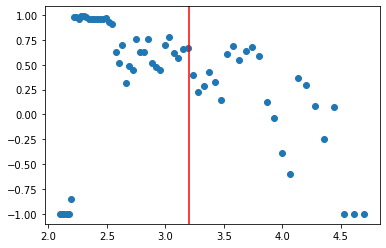

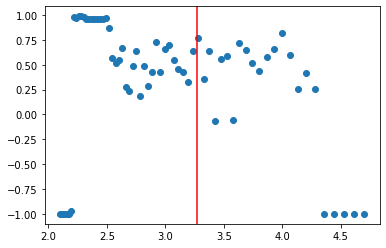

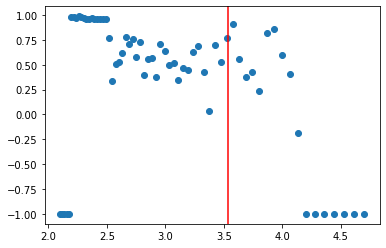

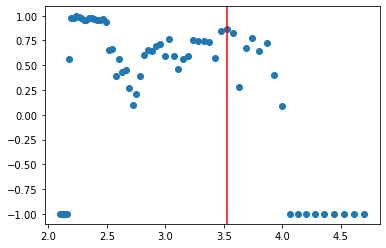

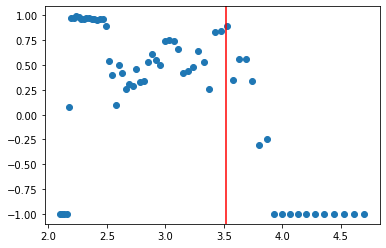

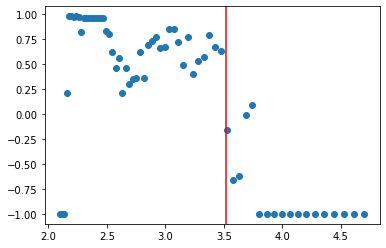

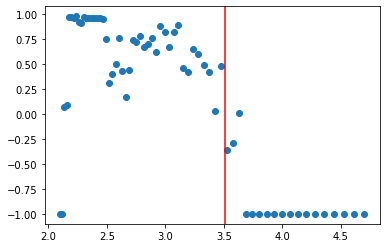

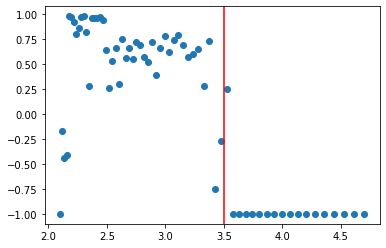

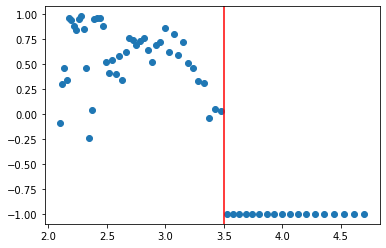

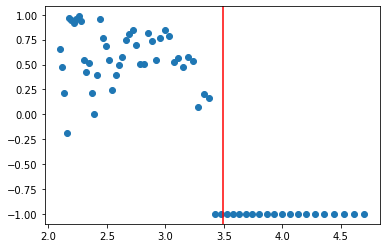

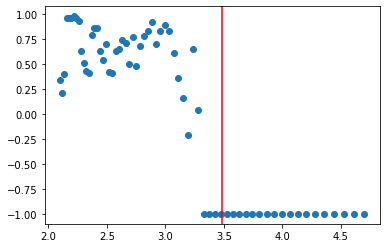

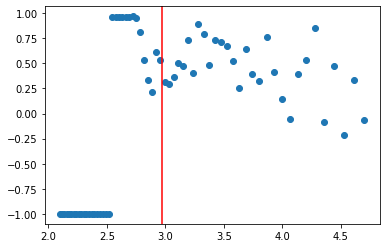

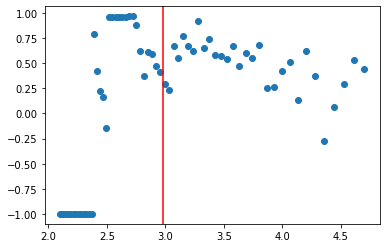

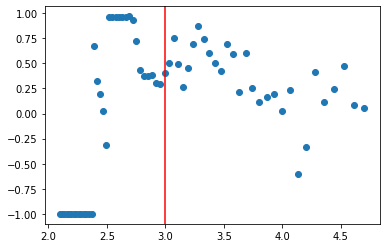

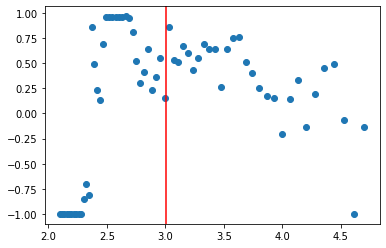

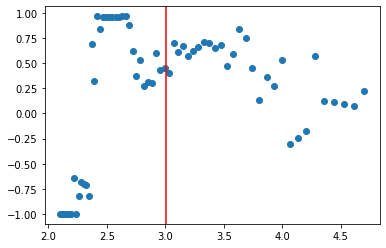

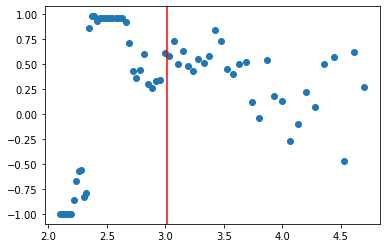

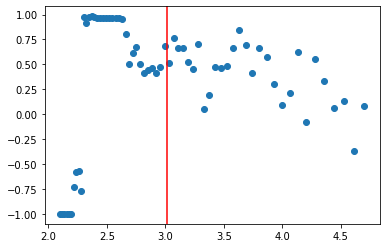

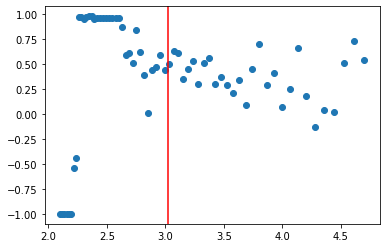

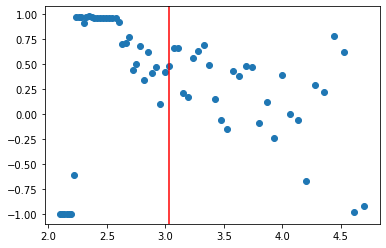

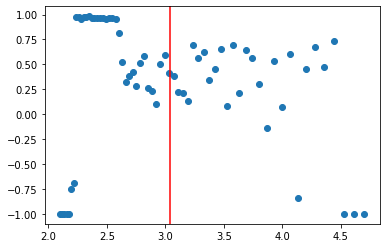

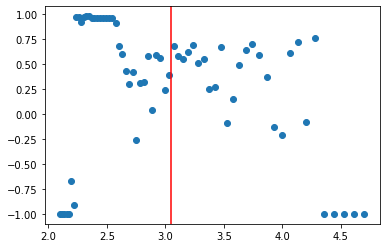

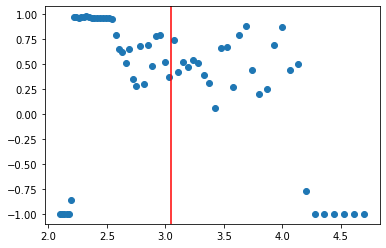

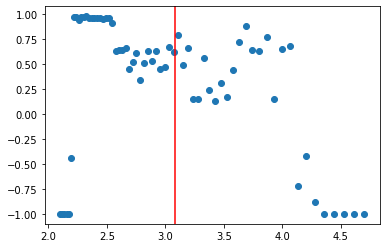

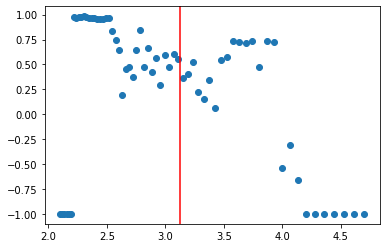

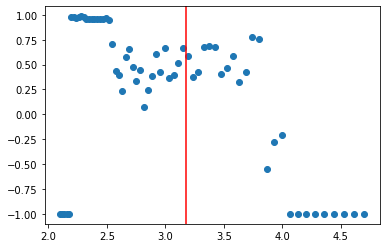

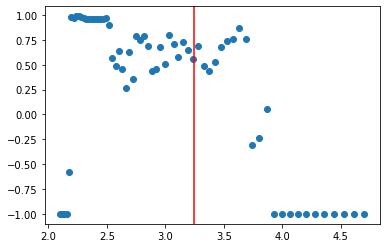

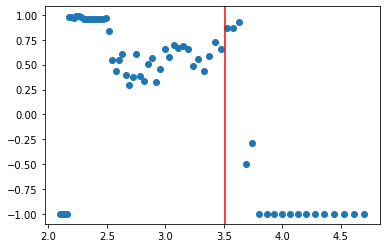

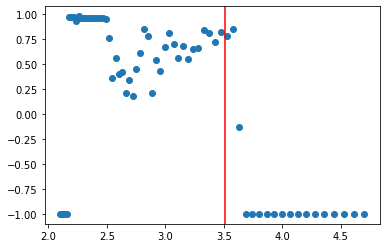

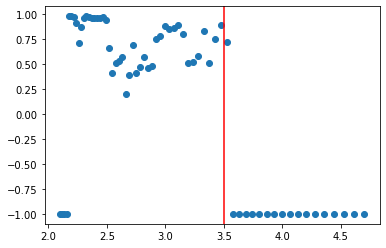

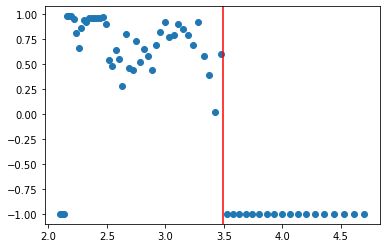

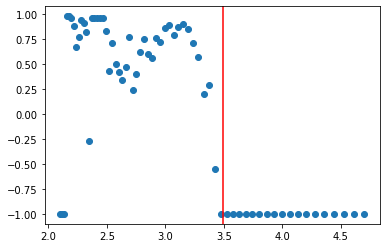

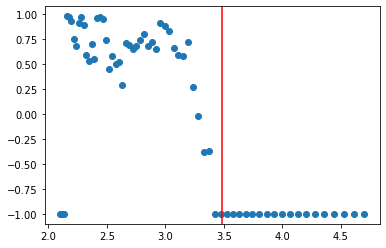

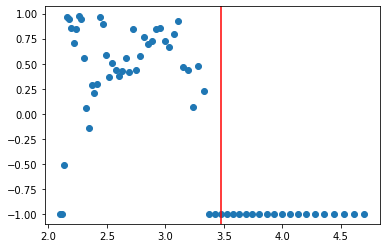

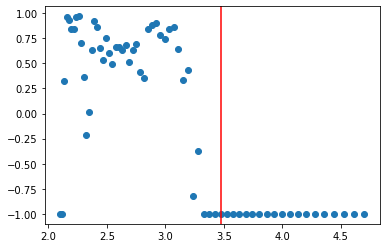

In [33]:

for y in range(40, 512-40, 20):
    for x in range(40, 640-40, 20):
        consis_w = consis_weight[y, x]
        que_d = que_depth[y, x]
        gt_val = depth_gt[y, x]
        if gt_val > 0:

            plt.scatter(que_d, consis_w)
            plt.axvline(x = gt_val, color = 'r', label = 'axvline - full height')
            plt.show()

In [5]:
consis_weight = consis_weight[0].reshape(512,640,64)